In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Materi.csv', error_bad_lines=False)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

In [4]:
round((df.isna().sum() / len(df) * 100),2)

hash_content_id        0.00
hash_play_id           0.00
hash_visit_id          0.00
hash_watcher_id        0.00
hash_film_id          94.54
hash_event_id          0.00
is_login               0.00
playback_location      0.00
platform               0.00
play_time              0.00
end_time               0.00
referrer               5.45
average_bitrate        4.73
bitrate_range          0.00
total_bytes            0.00
buffer_duration        0.00
referrer_group         0.00
completed             36.50
utm_source            99.89
utm_medium            99.89
utm_campaign          99.96
player_name            3.08
has_ad                 0.00
flash_version         32.71
os_name               31.69
os_version             0.37
browser_name          31.61
browser_version       33.87
app_name               0.00
autoplay              36.52
is_premium             0.00
app_version           67.45
city                 100.00
play_duration          0.00
content_type           0.00
stream_type         

## Check Missing Value

In [5]:
pd.options.display.max_columns=999

In [6]:
df.sample(4)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,utm_source,utm_medium,utm_campaign,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
678092,aecbf37980b0fc4506d19f08ba1d65974b1d2fa99055bf...,0aa17c84839000257bf2ba135c4c2a8c35af41727c31b8...,6b3328210922246145a5a0ef4635a9d3ab0d9f9c058a00...,9625a811f1355793f589e7daa88a9b086c15c958d33e07...,NaN,e244823d81fe86384138b36271713a8b04a6c26e017045...,False,embed,web-mobile,2020-02-12T17:01:36.000Z,2020-02-12T17:01:53.000Z,https://m.bola.com/ragam/read/4082813/6-cara-m...,300000.0,200-500,637500,0.784,bola,False,NaN,NaN,NaN,videojs,True,"0,0,0",iOS,13.3,Mobile Safari,13.0.4,vidio,False,False,NaN,NaN,17,vod,NaN,Madu dan Garam Obat Jerawat Untuk Si Kulit Bem...,Lifestyle,NaN,NaN,NaN
38821,5b9596cfabda0b26dad0d3eb32c398cebd9d25c365fcf6...,5a1bf23573d525f82baf8ceb2e35b329a8e6c33e17b7e5...,f3a2af020ef9b45b9e43d5372cb877fa3fa3ca8bd78741...,93f0038e9152ecc157a2ba16bbc24c0088625e2910f793...,NaN,e3bea58ff6068dd307443467158890080f0b025ae6c207...,False,embed,web-mobile,2020-02-13T05:55:35.000Z,2020-02-13T05:56:18.000Z,https://m.merdeka.com/artis/repotnya-nia-ramad...,600.0,0-200,1500,0.148,merdeka,True,NaN,NaN,NaN,videojs,True,"0,0,0",Android,9,Chrome Mobile WebView,70.0.3538,vidio,False,False,NaN,NaN,43,vod,NaN,Karen Idol Bagikan Kenangan dengan Sang Anak d...,News,NaN,NaN,NaN
408090,015b6c16fad86182cde93b17341f75ee06c065ebfdfd91...,399de4aad545e7f0a50e7139b01f1885cb113b26cfcf45...,3612a35cc5a9ee37f7d83fcd295d97251d69c1eef5a85a...,a446f13af14ae28bf43b741bf87133806484d8124448ad...,NaN,6c14f17b58aa0fd446a3f5942526600e873bdfd0c73a8a...,False,embed,web-mobile,2020-02-16T00:21:38.000Z,2020-02-16T00:21:38.000Z,http://appyet_base/,600.0,0-200,750,0.000,others,False,NaN,NaN,NaN,videojs,True,"0,0,0",Android,9,Chrome Mobile WebView,74.0.3729,vidio,False,False,NaN,NaN,0,vod,NaN,5 Penyerang Kiri Termahal di Dunia 2019-2020,Sports,NaN,NaN,NaN
629357,3b4bee7de5f1464e59301f5cab582e9ada969bb1964a64...,152982f67935247337d5655ced10d149a5fc34606278ff...,498ef228ff4d8c41cbc02bf1d810f7807aae63eeeecd91...,0062f7d1eba4c4550adc26f0d4445c132e21ce0faf2ab2...,NaN,d680f5829a0c91ff65480daa0acacfb57a27b24502f2fb...,False,direct,tv-android,2020-02-02T06:04:25.000Z,2020-02-02T06:12:41.000Z,NaN,300000.0,200-500,90000000,1342.000,empty,NaN,NaN,NaN,NaN,KmkExoVideoView,False,NaN,NaN,23,NaN,NaN,vidio,NaN,False,1.4.2 (65),NaN,240,livestreaming,TvStream,BeritaSatu,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(columns=['city','hash_film_id'], axis=1)

In [8]:
avg_bit = {
    'average_bitrate' : df['average_bitrate'].median()
}

In [9]:
df1 = df.fillna(avg_bit)

In [10]:
df1 = df1.drop(columns=['utm_source','utm_medium','utm_campaign'], axis=1)

In [11]:
round((df1.isna().sum() / len(df1) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              5.45
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.50
player_name           3.08
has_ad                0.00
flash_version        32.71
os_name              31.69
os_version            0.37
browser_name         31.61
browser_version      33.87
app_name              0.00
autoplay             36.52
is_premium            0.00
app_version          67.45
play_duration         0.00
content_type          0.00
stream_type          63.50
title                 0.00
category_name        36.50
film_title           94.54
season_name          94.54
genre_name           95.15
dtype: float64

In [12]:
df1 = df1.drop(columns=['film_title','season_name','genre_name'], axis=1)

In [13]:
round((df1.isna().sum() / len(df1) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              5.45
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.50
player_name           3.08
has_ad                0.00
flash_version        32.71
os_name              31.69
os_version            0.37
browser_name         31.61
browser_version      33.87
app_name              0.00
autoplay             36.52
is_premium            0.00
app_version          67.45
play_duration         0.00
content_type          0.00
stream_type          63.50
title                 0.00
category_name        36.50
dtype: float64

In [14]:
df1['category_name'].unique()

array(['Movies', 'News', 'Music', 'Entertainment', 'Sports', 'Vlog',
       'Lifestyle', 'TV Show', 'Korea', nan, 'Kids', 'Funny', 'Horror',
       'Education', 'Webtoon', 'Champions'], dtype=object)

In [15]:
df1[df1['stream_type'].isna()].sample(10)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,app_version,play_duration,content_type,stream_type,title,category_name
408304,1ece0e714d82b3be96ffb7eda7a022e258c8b15fd41b11...,5e298e02a59e91e0f2b3f9438c5b5d6a1cd2db467b4883...,1ee093b5105be5b5c842032f8095ee904c513ce4aebfcd...,949c84ef8ec8de67a7a1a25a707395d3ee55ec339ac7b5...,cc34e95c2c96997895e79b9df5c698f46dc96985e13a3e...,False,embed,web-mobile,2020-02-16T07:05:24.000Z,2020-02-16T07:05:54.000Z,https://m.liputan6.com/ucnews/4179777/deretan-...,300000.0,200-500,975000,0.335,liputan6,False,videojs,True,"0,0,0",Android,9,UC Browser,13.0.2,vidio,False,False,NaN,26,vod,NaN,Pujian Pep Guardiola Untuk Kevin De Bruyne Usa...,Sports
95108,18a431c3c27606d9cecc49dfb92b14d2a0ad49db2841d7...,d9e2a8d9cf86a4d4863df101cc08c8f8bcc61933d731af...,ee48bc0c5220a472fac38f96df4b1281ed5f0ae9412240...,f3083b38df25d03e8dcba5d2fd99132809c94f66ec0492...,f1c4e6f8e262f11aa12a501549b29275a2afb6adaa918f...,False,embed,web-mobile,2020-02-12T06:54:55.000Z,2020-02-12T06:55:53.000Z,https://m.merdeka.com/trending/5-penampakan-us...,300000.0,200-500,1012500,0.000,merdeka,False,videojs,True,"0,0,0",Android,9,Facebook,247.0.0,vidio,False,False,NaN,27,vod,NaN,Polisi Geledah Rumah Pemilik WO Panda Manda,News
170104,5af920c4085dd8190e6d032f5f4ab7764ffbceb13b854c...,80306426ea06b5e4a0971f6f0d3a3e8ceaa77d48c8632a...,25d503a157e0673add7f11af4bc44dcefed685ed6e326c...,f1a7cd8fd74b109d8e968e5763bac951c5e01f2c2ecd8d...,4c471f8987faef5970823da68fb08493cb33aeceb3251b...,True,direct,app-android,2020-02-05T08:01:36.000Z,2020-02-05T08:52:48.000Z,vod watchpage,300000.0,200-500,156637500,15.672,others,True,KmkExoVideoView,True,NaN,NaN,28,NaN,NaN,vidio,True,False,4.18.11-0369bca (3187670),4177,vod,NaN,Samudra Cinta - Episode 110 dan 111 Part 2/2,TV Show
198078,3ff9e380f8a3a4b2184f2d43fab2831923973618989d74...,0886239361fe485e6dd084f1b906b85111e9ff370a0578...,f502b4458b1de7b43fe1f0f90f62f5009f945dab80c2ef...,078f70975bdba0a7c7ac3d425eb3b9457f1b6d0a3ff5e5...,c2b4d62f5bae4c2a24b6715f345a17c5ffd36172c9cfe4...,False,embed,web-mobile,2020-02-09T23:54:13.000Z,2020-02-09T23:55:33.000Z,https://m.merdeka.com/trending/bunda-sarita-pe...,300000.0,200-500,1650000,0.450,merdeka,True,videojs,True,"0,0,0",Android,7.1.1,Facebook,256.0.0,vidio,False,False,NaN,44,vod,NaN,"Kesal Obat Habis, Pria Wuhan Sengaja Batuk ke ...",News
258434,67c213a3493aa0b565144bfe5eebc39b1bc34b2bd31a74...,b2b4a19a4d84a16265fdafc0aac472a287dbf8531b1d76...,490fe026def35bc1b6b20b30f39cfd51b1bedd48d3a86f...,c24c85ab4bd92be03ab254a529950503e094a921405519...,57cd50b5c6bfeade9ed1e1bdd2ffbbc7150f25b03ccec6...,False,embed,web-mobile,2020-02-07T17:57:58.000Z,2020-02-07T17:58:05.000Z,https://m.merdeka.com/foto/dunia/1145932/20200...,300000.0,200-500,262500,0.127,merdeka,False,videojs,True,"0,0,0",Android,6.0.1,Facebook,251.0.0,vidio,False,False,NaN,7,vod,NaN,Begini Reaksi Ular Kobra Saat Diajak Breakdance,News
684903,5b9596cfabda0b26dad0d3eb32c398cebd9d25c365fcf6...,0c32910acca24877161b3618bfb5569f685e96e88b6bfa...,e8f00b3cefe03b96342895743537ce5e9e11166ac93151...,776f08ca2cdb6fdf99f0c907133a4613400af51e379529...,bdc1f26fdba2c8e5827c28a01e85edaef8b664bd89ea97...,False,embed,web-desktop,2020-02-14T05:43:32.000Z,2020-02-14T05:44:34.000Z,https://www.merdeka.com/dunia/mengapa-singapur...,700.0,0-200,2625,1.323,merdeka,True,videojs,True,"0,0,0",Windows,10,Chrome,79.0.3945,vidio,True,False,NaN,43,vod,NaN,Karen Idol Bagikan Kenangan dengan Sang Anak d...,News
159730,cd1c1c7051d2c037754e33ea7eade52368195b6b5665c2...,eff04aba2c3e230dddf286a91c78c80aebe09f16d68b9a...,33841079e193d86e491fb0d88a9bbbaf033c036696d339...,9791194bcff1b5d2d325f5f6d5d022eff6262b12300c07...,63e09d002617d1ab01ef83253bae4519765b42167d6d64...,Fal

In [16]:
df1['stream_type'].unique()

array([nan, 'TvStream', 'EventStream'], dtype=object)

In [17]:
stream = {
    'stream_type' : 'RadioStream'
}

In [18]:
df1 = df1.fillna(stream)

In [19]:
df1['stream_type'].unique()

array(['RadioStream', 'TvStream', 'EventStream'], dtype=object)

## Check Category name 

In [20]:
df_tv = df1[(df1['stream_type'] == 'TvStream') & (df1['category_name'].isna())]

In [21]:
df_event = df1[(df1['stream_type'] == 'EventStream') & (df1['category_name'].isna())]

In [22]:
df_all = df1[df1['category_name'].notnull()]


In [23]:
fill_tv = {
    'category_name' : 'TV Channel'
}

In [24]:
df_tv = df_tv.fillna(fill_tv)

In [25]:
df_tv

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,app_version,play_duration,content_type,stream_type,title,category_name
169,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,301c99fe7427924cda2bcc2b75b2fa284bd32cc8bbf360...,114e1ba8db5c4536e60e37dd996ea47c4c49bd39717b20...,5a6cd4d3b0ff67860b30e4fa5cf3de0ab3093c77dd3104...,0ecba5c9eafab795e1d6c7481803b3e7d56ea8ed2e346d...,False,direct,tv-android,2020-02-14T17:44:17.000Z,2020-02-14T17:44:17.000Z,home,300000.0,200-500,5625000,1557.0,others,NaN,KmkExoVideoView,False,NaN,NaN,23,NaN,NaN,vidio,NaN,False,1.5.0 (28),15,livestreaming,TvStream,iNews,TV Channel
170,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,3e8daddc4e0fa5c389fb2a4f4b64036c4a3da154c042e2...,632ae4bd02a8a3e5c2f7615b91cdfd09585e6af72457e6...,0f14f6fd48c418a9f5f4860ab0ff52334869341b9acec4...,fcba49bb9659a8e8fecb529fc9d49e2056817daa2a492d...,True,direct,app-android,2020-02-15T12:25:28.000Z,2020-02-15T12:27:23.000Z,livestreaming watchpage,300000.0,200-500,67500000,2.0,others,NaN,KmkExoVideoView,False,NaN,NaN,24,NaN,NaN,vidio,NaN,False,4.24.9-403fc76 (3188606),180,livestreaming,TvStream,iNews,TV Channel
171,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,4d2ed0fee254f4014a842c62cce193262735cc645b5256...,4cb09bf1bc79967acb51cc038f094c4418ea9b7c61185b...,e563071189f16bbfffc83c1eeb933b624deab248e70898...,3a62c8c365d15e51c0cd6d15f098f6eb43ab02ba3fdd70...,True,direct,app-android,2020-02-15T02:36:53.000Z,2020-02-15T02:40:39.000Z,live index,300000.0,200-500,5625000,1.0,others,NaN,KmkExoVideoView,False,NaN,NaN,27,NaN,NaN,vidio,NaN,False,4.23.13-b3b0f90 (3188596),15,livestreaming,TvStream,iNews,TV Channel
172,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,6292683b77dc3751bd708be592014715c3eb6d3dde6a2f...,670d0a8d6903ca86dd9f182ca64e71c8fc6174fcedb600...,232c20714dc190d89ff7210dc80932928180badd11a63e...,23aa4a9234cf59de2799e9abd206125e74f6bea6b4de3d...,False,direct,web-mobile,2020-02-15T00:50:37.000Z,2020-02-15T00:50:37.000Z,https://m.vidio.com/live,300000.0,unknown,0,3.0,internal,NaN,videojs,False,"0,0,0",Windows,7,Chrome,80.0.3987,vidio,NaN,False,NaN,0,livestreaming,TvStream,iNews,TV Channel
173,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,75c85b4a9018aad5480d25bdf10381bde66687f47ebc29...,202eb51230fc9cc655c9cca1279e2cd58b4d5bb7923361...,0fb14d16c38774ad76a0446145cce118211420bd7d75c8...,fae457782250f264df028e674f6817b932ed611eeeed20...,False,direct,tv-android,2020-02-15T12:03:39.000Z,2020-02-15T12:03:39.000Z,NaN,300000.0,unknown,0,1471.0,empty,NaN,KmkExoVideoView,False,NaN,NaN,28,NaN,NaN,vidio,NaN,False,1.16.2 (74),0,livestreaming,TvStream,iNews,TV Channel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742550,fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...,fd2ba6978acd4036710617e9ad39473e2759953d8fd9c1...,5dff9b06b326388b6c0458d0fc98dc9528d8ec8dae6b90...,b6dcbd9232568fbf67ea8680b2155b8964cced250cfb24...,e8e831ee4d8e35534bdc02ff59e815ed73cfe8e3f406cb...,True,direct,app-android,2020-02-09T11:02:23.000Z,2020-02-09T12:21:09.000Z,tv show index,300000.0,200-500,855000000,5.0,others,NaN,KmkExoVideoView,True,NaN,NaN,25,NaN,NaN,vidio,NaN,False,4.24.9-403fc76 (3188606),2280,livestreaming,TvStream,SCTV,TV Channel
742551,fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...,fd67a2988a28243e008aaa7becba43f3bb682bee97a290...,39b6860e6e8a693e2180dbf5e83188b6bfa6efe6790b58...,c9fb94a8517f53662c08b6fbcc40ffae8d2d37a490cd47...,e2d88922f7d57f27b79d636b401698440d87c48bc9766c...,False,direct,app-android,2020-02-09T13:17:00.000Z,2020-02-09T13:18:07.000Z,search_result,300000.0,200-500,45000000,33.0,others,NaN,KmkExoVideoView,True,NaN,NaN,23,NaN,NaN,vidio,NaN,False,4.24.9-403fc76 (

In [26]:
df_event['title'].unique()

array(['Barcelona vs Getafe - La Liga - 15 Feb 2020 | 22:00 WIB',
       '21 Dec 2019 | 15:30 WIB - Persela Lamongan vs Semen Padang - Shopee Liga 1',
       'ATP Tour ABN - Semi Final - 15  Feb 2020 | 21:00 WIB',
       'KEPOIN LIDA ZOZO #7 - 16 Feb 2020 | 19:00 WIB',
       'NBA All-Star 2020 - Skill Challenge - 16 Feb 2020 | 08:00 WIB',
       'West Bromwich Albion vs Nottingham Forest - EFL -  15 Feb 2020 | 19:30 WIB',
       'Launching Nagas Ange7s 2020 Full Of Love - 15 Feb 2020 | 16:00 WIB',
       'KEPOIN LIDA ZOZO #5 - 14 Feb 2020 | 19:00 WIB',
       'NBA All-Star 2020 - Rising Stars - 15 Feb 2020 | 09:00 WIB',
       'SINEMANIA \\Get Married - Vidio Original Series\\" BARENG DAVID & YULIANA - 16 Feb 2020 | 14:00 WIB"',
       'Miami Heat vs LA Clippers - 06 Feb 2020 | 10:00 WIB',
       'Real Betis vs Barcelona - La Liga - 10 Feb 2020 | 03:00 WIB',
       'ATP Tour ABN - First Round - 10 Feb 2020 | 19:00 WIB',
       'KEPOIN LIDA ZOZO - 11 Feb 2020 | 19:00 WIB',
       'LA C

In [27]:
df_event_music = df_event[(df_event['title'] == 'KEPOIN LIDA ZOZO #7 - 15 Feb 2020 | 19:00 WIB') | (df_event['title'] == 'KEPOIN LIDA ZOZO #5 - 14 Feb 2020 | 19:00 WIB') 
                          | (df_event['title'] == 'KEPOIN LIDA ZOZO #8 - 14 Feb 2020 | 19:00 WIB') | (df_event['title'] == 'KEPOIN LIDA ZOZO #3 - 14 Feb 2020 | 19:00 WIB') 
                          | (df_event['title'] == 'KEPOIN LIDA ZOZO #6 - 14 Feb 2020 | 19:00 WIB') | (df_event['title'] == 'KEPOIN LIDA ZOZO #5 - 14 Feb 2020 | 19:00 WIB')]

In [28]:
event_music = {
    'category_name' : 'Music'
}

In [29]:
df_em = df_event_music.fillna(event_music)

In [30]:
df_event_entertainment = df_event[(df_event['title'] == 'SINEMANIA \\Get Married - Vidio Original Series\\" BARENG DAVID & YULIANA - 16 Feb 2020 | 14:00 WIB"') 
         | (df_event['title'] == 'Vidio Talk Ngobrol Bareng Iqbaal dan Vanesha - 10 Feb 2020 | 16:00WIB') | (df_event['title'] == 'Sinemania \\Get Married - Vidio Original Series\\" Bareng David & Yuliana - 16 Feb 2020 | 14:00 WIB"')
         | (df_event['title'] == 'Launching Nagas Ange7s 2020 Full Of Love - 15 Feb 2020 | 16:00 WIB')]

In [31]:
event_entertainment = {
    'category_name' : 'Entertainment'
}

In [32]:
df_ee = df_event_entertainment.fillna(event_entertainment)

In [33]:
df_event_other = df_event[(df_event['title'] == '[17 Feb 19:30] Live Streaming Debat Capres 2')]

In [34]:
event_other = {
    'category_name' : 'Other'
}

In [35]:
df_eo = df_event_other.fillna(event_other)

In [36]:
df_event_news = df_event[df_event['title'] == 'Breaking News - Pelepasan WNI yang diobservasi di Natuna.']

In [37]:
event_news = {
    'category_name' : 'News'
}

In [38]:
df_en = df_event_news.fillna(event_news)

In [39]:
df_event_lifestyle = df_event[(df_event['title'] == 'BAPER (BAWA PERUBAHAN) - Komunikasi Lewat Secangkir Kopi - 06 Feb 2020 | 15:00 WIB') 
         | (df_event['title'] == 'Dear Netizen - Traveling DI Tengah Ancaman Corona Amankah? - 07 Feb 2020 | 15:00 WIB')]

In [40]:
event_lifestyle = {
    'category_name' : 'Lifestyle'
}

In [41]:
df_el = df_event_lifestyle.fillna(event_lifestyle)

In [42]:
df_event_sport = df_event[(df_event['title'] != 'KEPOIN LIDA ZOZO #7 - 15 Feb 2020 | 19:00 WIB') | (df_event['title'] != 'KEPOIN LIDA ZOZO #5 - 14 Feb 2020 | 19:00 WIB') 
        | (df_event['title'] != 'KEPOIN LIDA ZOZO #8 - 14 Feb 2020 | 19:00 WIB') | (df_event['title'] != 'KEPOIN LIDA ZOZO #3 - 14 Feb 2020 | 19:00 WIB') 
        | (df_event['title'] != 'KEPOIN LIDA ZOZO #6 - 14 Feb 2020 | 19:00 WIB') | (df_event['title'] != 'KEPOIN LIDA ZOZO #5 - 14 Feb 2020 | 19:00 WIB') 
        | (df_event['title'] != 'SINEMANIA \\Get Married - Vidio Original Series\\" BARENG DAVID & YULIANA - 16 Feb 2020 | 14:00 WIB"') 
        | (df_event['title'] != 'Vidio Talk Ngobrol Bareng Iqbaal dan Vanesha - 10 Feb 2020 | 16:00WIB') | (df_event['title'] != 'Sinemania \\Get Married - Vidio Original Series\\" Bareng David & Yuliana - 16 Feb 2020 | 14:00 WIB"')
        | (df_event['title'] != 'Launching Nagas Ange7s 2020 Full Of Love - 15 Feb 2020 | 16:00 WIB') | (df_event['title'] != '[17 Feb 19:30] Live Streaming Debat Capres 2')
        | (df_event['title'] != 'Breaking News - Pelepasan WNI yang diobservasi di Natuna.') | (df_event['title'] != 'BAPER (BAWA PERUBAHAN) - Komunikasi Lewat Secangkir Kopi - 06 Feb 2020 | 15:00 WIB') 
        | (df_event['title'] != 'Dear Netizen - Traveling DI Tengah Ancaman Corona Amankah? - 07 Feb 2020 | 15:00 WIB')]

In [43]:
event_sport = {
    'category_name' : 'Sports'
}

In [44]:
df_es = df_event_sport.fillna(event_sport)

In [45]:
df_es

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,app_version,play_duration,content_type,stream_type,title,category_name
1176,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,354d3a4dcdaa9659d1fac092f1fc1184abec59c0b72678...,5b41bc55dbf84656a1d061b168134a512001907f033628...,76822a83bbc8d62304de071bf6b31336087efe8bfcc935...,d8e3d8c5db1c98430c66d26025168d4050dd55e5a4c97c...,True,direct,web-desktop,2020-02-15T16:08:14.000Z,2020-02-15T16:56:41.000Z,https://www.vidio.com/live/6722-barcelona-vs-g...,300000.0,200-500,1085625000,17.0,internal,NaN,videojs,False,"0,0,0",Windows,10,Chrome,79.0.3945,vidio,NaN,True,NaN,2895,livestreaming,EventStream,Barcelona vs Getafe - La Liga - 15 Feb 2020 | ...,Sports
1177,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,67baedcb68471a2abba3e3a575a0c31d0ee2dc7dec9ac1...,1d71af50f18e87e6a5d5ce943112c927abf800b0a754ef...,8538be220a86939fbcc07aa9f94ec8c39ca7f3d9dbd7e0...,0352dcaf11969f408d1fe6421e8879610bb57e638fc04e...,True,direct,app-android,2020-02-15T16:31:41.000Z,2020-02-15T16:57:34.000Z,livestreaming watchpage,300000.0,200-500,596250000,4.0,others,NaN,KmkExoVideoView,False,NaN,NaN,28,NaN,NaN,vidio,NaN,True,4.21.14.1-f711505 (3188572),1590,livestreaming,EventStream,Barcelona vs Getafe - La Liga - 15 Feb 2020 | ...,Sports
1178,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,bde6b0dc5a2773b6cc63e677fb8b5bed11d7ffc349faa2...,a23b84ed9ea54a3956862f0db8c596ed244d4cc5eef5d1...,3c402d7ed11e2494de06844a4fb620fd9f6980c164ae8f...,bde6b0dc5a2773b6cc63e677fb8b5bed11d7ffc349faa2...,True,direct,app-ios,2020-02-15T15:11:11.000Z,2020-02-15T15:11:11.000Z,deeplink,1372.0,0-200,102900,0.0,others,NaN,NaN,False,NaN,NaN,iOS13.3.1,NaN,NaN,vidio,NaN,True,4.25.0,60,livestreaming,EventStream,Barcelona vs Getafe - La Liga - 15 Feb 2020 | ...,Sports
1179,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,cf6cb10a8675461faa7f58ab83a2b0ab9099429c50aba0...,f1cb6d19704ffecee17c2c7b32e1c6cd64743bf674e58b...,f74e449df594e6b98e4eefe043b705ed0592a5c953cbd6...,cf6cb10a8675461faa7f58ab83a2b0ab9099429c50aba0...,True,direct,app-ios,2020-02-15T16:18:25.000Z,2020-02-15T16:18:25.000Z,live index,2688.0,0-200,201600,0.0,others,NaN,NaN,False,NaN,NaN,iOS13.3.1,NaN,NaN,vidio,NaN,True,4.25.0,60,livestreaming,EventStream,Barcelona vs Getafe - La Liga - 15 Feb 2020 | ...,Sports
1180,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,d6f5daf6d2463f532ef228ddf9e95bf439a5917e9a7ee2...,e26095321cfb030f20305d2e1d6fbbf8d538757f26d751...,12a06d9c456623238237679efc62874cb79bc16353bcd1...,d6f5daf6d2463f532ef228ddf9e95bf439a5917e9a7ee2...,True,direct,app-ios,2020-02-15T16:21:20.000Z,2020-02-15T16:54:39.000Z,NaN,2519.0,0-200,7368900,0.0,empty,NaN,NaN,False,NaN,NaN,iOS13.3,NaN,NaN,vidio,NaN,True,4.25.0,2340,livestreaming,EventStream,Barcelona vs Getafe - La Liga - 15 Feb 2020 | ...,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741172,bf91a58a6c67908f16a00bde8ac81215de71c937611f85...,7d05a5b3073fd2a248db57e1d8f2856ddc3c632be84b0d...,56c4ac9ee45322984d59929a50814859f96ca9d50edc38...,f148e36c34477fbd1499817336a0dc07a0c603bffc4785...,7d05a5b3073fd2a248db57e1d8f2856ddc3c632be84b0d...,True,direct,app-ios,2020-02-08T21:13:14.000Z,2020-02-08T21:13:14.000Z,live index,3602.0,0-200,540300,0.0,others,NaN,NaN,False,NaN,NaN,iOS12.4.1,NaN,NaN,vidio,NaN,True,4.24.0,120,livestreaming,EventStream,Parma vs Lazio - Serie A - 10 Feb 2020 | 00:00...,Sports
741448,ce0f260d26064118bd9e5d32796ec10ceb95e36e9f12a7...,80089a931af259836587bd73fb32d5cf068c9668750efd...,b23355d62924816735af9e166063660987183a9f4e1937...,8afecdd2d428dcfa09ae085d698058360f15dabce1a771...,a6baad5226bec491ec82a46779a964c6aa3cc5be473097...,Tr

In [46]:
df_event_comb = pd.concat([df_em,df_ee,df_eo,df_en,df_el,df_es])

In [47]:
df2 = pd.concat([df_all,df_tv,df_event_comb])

In [48]:
df2 = df2.drop('app_version', axis=1)

In [49]:
round((df2.isna().sum() / len(df2) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              5.42
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.80
player_name           3.07
has_ad                0.00
flash_version        32.57
os_name              31.55
os_version            0.37
browser_name         31.47
browser_version      33.73
app_name              0.00
autoplay             36.82
is_premium            0.00
play_duration         0.00
content_type          0.00
stream_type           0.00
title                 0.00
category_name         0.00
dtype: float64

## Check OS Name & OS Version

In [50]:
df_osv = df2[(df2['os_name'].notnull()) & (df2['os_version'].isna())]

In [51]:
df_osv['os_name'].unique()

array(['Ubuntu', 'Linux', 'Other', 'Firefox OS', 'Symbian^3 Anna',
       'Fedora'], dtype=object)

In [52]:
df_osv2 = df2[(df2['os_name'].isna()) & (df2['os_version'].notnull())]

In [53]:
df_osv2['os_version'].unique()

array(['28', '23', '22', '4.0', 'iOS13.3.1', '27', '19', '26', '24', '25',
       '21', 'iOS13.3', '29', 'iOS12.4.1', '5.0', 'iOS12.3.1',
       'iOS12.4.5', 'iOS13.1.2', '18', 'iOS13.1.3', '17', 'iOS11.2.5',
       'iOS12.4.4', 'iOS12.4', '16', 'iOS12.1.4', 'iOS10.3.4', 'iOS12.2',
       'iOS11.2.6', 'iOS13.0', 'iOS12.4.3', 'iOS10.2.1', 'iOS10.3.3',
       'iOS13.2', 'iOS11.3', 'iOS10.1.1', 'iOS13.2.3', '3.0', 'iOS12.4.2',
       'iPhone OS9.3.2', 'iOS11.3.1', 'iOS12.1.3', 'iOS12.3.2',
       'iOS11.4.1', 'iOS12.1', 'iOS12.1.2', 'iOS10.2', 'iOS12.1.1',
       'iOS13.2.2', 'iOS11.4', 'iOS13.4', 'iOS10.3.2', 'iOS11.1.2',
       'iOS12.0', '4.70.15', 'iPhone OS9.3.5', 'iPhone OS9.3.6',
       'iOS11.0.1', 'iOS13.1.1', 'iOS13.1', 'iOS10.0.2', 'iOS12.0.1',
       'iPhone OS9.3.3', 'iOS11.0.3', 'iOS11.2.2', 'iOS10.3.1', 'iOS10.1',
       'iOS12.3', 'iPhone OS9.2.1', 'iOS11.2.1', 'iOS11.1.1', 'iOS11.1',
       'iOS11.2', 'iPhone OS9.1', 'iPhone OS9.3.1', 'iPhone OS9.0',
       'iPhone OS9.0.

In [54]:
df_osv3 = df2[(df2['os_name'].notnull()) & (df2['os_version'].notnull())]

In [55]:
df_osv4 = df2[(df2['os_name'].isna()) & (df2['os_version'].isna())]

In [56]:
## IOS & Android 

In [57]:
df_os_android = df_osv2[(df_osv2['os_version'] == '28') | (df_osv2['os_version'] == '23') | (df_osv2['os_version'] == '22') | (df_osv2['os_version'] == '4.0') 
        | (df_osv2['os_version'] == '27') | (df_osv2['os_version'] == '19') | (df_osv2['os_version'] == '26') | (df_osv2['os_version'] == '24') 
        | (df_osv2['os_version'] == '25') | (df_osv2['os_version'] == '21') | (df_osv2['os_version'] == '29') | (df_osv2['os_version'] == '5.0') 
        | (df_osv2['os_version'] == '18') | (df_osv2['os_version'] == '17') | (df_osv2['os_version'] == '16') | (df_osv2['os_version'] == '3.0') 
        | (df_osv2['os_version'] == '4.70.15')]

In [58]:
android = {
    'os_name' : 'Android'
}

In [59]:
df_android = df_os_android.fillna(android)

In [60]:
df_os_ios = df_osv2[(df_osv2['os_version'] == 'iOS13.3.1') | (df_osv2['os_version'] == 'iOS13.3') | (df_osv2['os_version'] == 'iOS12.4.1') | (df_osv2['os_version'] == 'iOS12.3.1') 
        | (df_osv2['os_version'] == 'iOS12.4.5') | (df_osv2['os_version'] == 'iOS13.1.2') | (df_osv2['os_version'] == 'iOS13.1.3') | (df_osv2['os_version'] == 'iOS11.2.5') 
        | (df_osv2['os_version'] == 'iOS12.4.4') | (df_osv2['os_version'] == 'iOS12.4') | (df_osv2['os_version'] == 'iOS12.1.4') | (df_osv2['os_version'] == 'iOS10.3.4') 
        | (df_osv2['os_version'] == 'iOS12.2') | (df_osv2['os_version'] == 'iOS11.2.6') | (df_osv2['os_version'] == 'iOS13.0') | (df_osv2['os_version'] == 'iOS12.4.3') 
        | (df_osv2['os_version'] == 'iOS10.2.1') | (df_osv2['os_version'] == 'iOS10.3.3') | (df_osv2['os_version'] == 'iOS13.2') | (df_osv2['os_version'] == 'iOS11.3') 
        | (df_osv2['os_version'] == 'iOS10.1.1') | (df_osv2['os_version'] == 'iOS13.2.3') | (df_osv2['os_version'] == 'iOS12.4.2') | (df_osv2['os_version'] == 'iPhone OS9.3.2') 
        | (df_osv2['os_version'] == 'iOS11.3.1') | (df_osv2['os_version'] == 'iOS12.1.3') | (df_osv2['os_version'] == 'iOS12.3.2') | (df_osv2['os_version'] == 'iOS11.4.1') 
        | (df_osv2['os_version'] == 'iOS12.1') | (df_osv2['os_version'] == 'iOS12.1.2') | (df_osv2['os_version'] == 'iOS10.2') | (df_osv2['os_version'] == 'iOS12.1.1') 
        | (df_osv2['os_version'] == 'iOS13.2.2') | (df_osv2['os_version'] == 'iOS11.4') | (df_osv2['os_version'] == 'iOS13.4') 
        | (df_osv2['os_version'] == 'iOS10.3.2') | (df_osv2['os_version'] == 'iOS11.1.2') | (df_osv2['os_version'] == 'iOS12.0') 
        | (df_osv2['os_version'] == '4.70.15') | (df_osv2['os_version'] == 'iPhone OS9.3.5') | (df_osv2['os_version'] == 'iPhone OS9.3.6') | (df_osv2['os_version'] == 'iOS11.0.1') 
        | (df_osv2['os_version'] == 'iOS13.1.1') | (df_osv2['os_version'] == 'iOS13.1') | (df_osv2['os_version'] == 'iOS10.0.2') | (df_osv2['os_version'] == 'iOS12.0.1') 
        | (df_osv2['os_version'] == 'iPhone OS9.3.3') | (df_osv2['os_version'] == 'iOS11.0.3') | (df_osv2['os_version'] == 'iOS11.2.2') | (df_osv2['os_version'] == 'iOS10.3.1') 
        | (df_osv2['os_version'] == 'iOS10.1') | (df_osv2['os_version'] == 'iOS12.3') | (df_osv2['os_version'] == 'iPhone OS9.2.1') | (df_osv2['os_version'] == 'iOS11.2.1') 
        | (df_osv2['os_version'] == 'iOS11.1.1') | (df_osv2['os_version'] == 'iOS11.1') | (df_osv2['os_version'] == 'iOS11.2') | (df_osv2['os_version'] == 'iPhone OS9.1') 
        | (df_osv2['os_version'] == 'iPhone OS9.3.1') | (df_osv2['os_version'] == 'iPhone OS9.0') | (df_osv2['os_version'] == 'iPhone OS9.0.1') | (df_osv2['os_version'] == 'iOS11.0') 
        | (df_osv2['os_version'] == 'iPhone OS9.2') | (df_osv2['os_version'] == 'iOS10.3') | (df_osv2['os_version'] == 'iOS10.0.1') | (df_osv2['os_version'] == 'iOS11.0.2')]


In [61]:
df_os_ios

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name
219,0b91c0decfe1b0d49a19ed5660a5b8af839e5dd9b03306...,3aee363e14dfef41749fab9be5131fe00526640fc87105...,478fbc058c1c0cd58e54f211fdde441afb6b3fed770d4a...,2e6adf3d16090285d4a78cc221523334936cc13f2733cc...,6256740af9c4df749cfce70b41dd8aad557e1c416e59c9...,True,direct,app-ios,2020-02-14T19:25:33.000Z,2020-02-14T19:25:34.000Z,search_result,300000.0,200-500,128887500,0.0,others,True,NaN,True,NaN,NaN,iOS13.3.1,NaN,NaN,vidio,True,False,3437,vod,RadioStream,Samudra Cinta - Episode 112 dan 113 Part 2/2,TV Show
897,43cb9307e46bc6852afef5af5d1cb7b279ea2e898d5cc8...,3d15d510737ddaa68ac9b007116c2626ec24ffebcbaf27...,e4976fd1b9aab31e74482aff558343695cef515212b04e...,abaeb9f4ff96c7fcae1a3dd7d623886729b8f75d77c131...,8e18493bbc165c451dd19bdcc416bff94125ec989d4812...,True,direct,app-ios,2020-02-15T06:00:58.000Z,2020-02-15T06:45:00.000Z,movie profile,300000.0,200-500,116550000,22.0,others,False,NaN,False,NaN,NaN,iOS13.3,NaN,NaN,vidio,True,False,3108,vod,RadioStream,Episode 03,Movies
1150,4ed22969c53cd7316971cb609a1756c26a3b3165c7ccd0...,c35e9c414da92f2ad416fd187a66207e46a6094c15baa5...,2e6e79bf7d68c95493839831ee37e50bac71a939247576...,1e88684d15fbe58ace6484caeede8357726b7c6372ba3d...,c3cf0ec8d1426319bfb6f3056555797f162b7db587dd7f...,False,direct,app-ios,2020-02-15T04:18:39.000Z,2020-02-15T04:18:39.000Z,vod watchpage,300000.0,200-500,0,2.0,others,False,NaN,True,NaN,NaN,iOS12.4.1,NaN,NaN,vidio,True,False,0,vod,RadioStream,Samudra Cinta - Episode 118 dan 119 Part 1/2,TV Show
1689,7e321d3c0baac6f70572bb16af8c86def71ad76f6f6bd6...,296192ae33f4cfdcc85b69c9bfde11f564cacc2e76d1f8...,034716b8bf6b4cd6dcb27f1de2aa6e7eb130e9cbaf69de...,7831a7aad91a0d8d93b64903d2b19f92550a2f77b4160d...,8508c3d462bd87943c943c051cc3d82c78bd1692db0508...,False,direct,app-ios,2020-02-15T11:05:11.000Z,2020-02-15T11:06:25.000Z,entertainment index,300000.0,200-500,2662500,0.0,others,False,NaN,True,NaN,NaN,iOS12.3.1,NaN,NaN,vidio,True,False,71,vod,RadioStream,Wah! Ada Tersangka Baru dalam Kasus Narkoba Lu...,News
1693,7ea9ea1ea14624135ff4d3fb62dfa9f662dde8944fd47d...,9e619f2245cd25b414d6b92ebdc6b8d5a2c9376a0faf45...,ae338288ec074f804fd35909416369120f4bb68ec86818...,c3594dd13aa5e8fd97216588f457081a9d27db2d7a0086...,cd37b7bed8a4406b01e4b0b44943df9e0a98f81535c812...,True,direct,app-ios,2020-02-15T16:07:12.000Z,2020-02-15T16:11:32.000Z,user profile,300000.0,200-500,12600000,1.0,others,True,NaN,True,NaN,NaN,iOS13.3.1,NaN,NaN,vidio,True,False,336,vod,RadioStream,"SEPENUH JIWA!!! Dikna-Jatim \Derita\"" Masuk Ke...",Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740526,983adc986531868a9ef48446fd07d5751982f6336ee073...,4bfc27462062ae8dd9fc7d13d3a477f48c5d38d2f24629...,f49b5666baacedc3f6008d1b534d8714a55cc208e0c925...,92275a898f9f0c891a1b72f94efcd921ac79f51699d85b...,4bfc27462062ae8dd9fc7d13d3a477f48c5d38d2f24629...,True,direct,app-ios,2020-02-09T03:58:42.000Z,2020-02-09T04:09:31.000Z,live index,805.0,0-200,664200,0.0,others,NaN,NaN,False,NaN,NaN,iOS13.2.2,NaN,NaN,vidio,NaN,True,660,livestreaming,EventStream,Utah Jazz vs Houston Rockets - 10 Feb 2020 | 0...,Sports
740527,983adc986531868a9ef48446fd07d5751982f6336ee073...,52acfda3d82e5ed2fba55c8eb7b4baf263b99cc1adbe31...,2b324b61342518f6b30b60856d5366c7505f0cef38914c...,08d08d03509e69a6ed002176f3e336446ca9f04f58899b...,52acfda3d82e5ed2fba55c8eb7b4baf263b99cc1adbe31...,True,direct,app-ios,2020-02-09T02:19:20.000Z,2020-02-09T02:19:20.000Z,live index,610.0,0-200,137250,0.0,others,NaN,NaN,False,NaN,NaN,iOS12.4.4,NaN,NaN,vidio,NaN,True,180,livestreaming,EventStream,Utah Jazz v

In [62]:
os_ios = {
    'os_name' : 'iOS'
}

In [63]:
df_ios = df_os_ios.fillna(os_ios)

In [64]:
df_ios

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name
219,0b91c0decfe1b0d49a19ed5660a5b8af839e5dd9b03306...,3aee363e14dfef41749fab9be5131fe00526640fc87105...,478fbc058c1c0cd58e54f211fdde441afb6b3fed770d4a...,2e6adf3d16090285d4a78cc221523334936cc13f2733cc...,6256740af9c4df749cfce70b41dd8aad557e1c416e59c9...,True,direct,app-ios,2020-02-14T19:25:33.000Z,2020-02-14T19:25:34.000Z,search_result,300000.0,200-500,128887500,0.0,others,True,NaN,True,NaN,iOS,iOS13.3.1,NaN,NaN,vidio,True,False,3437,vod,RadioStream,Samudra Cinta - Episode 112 dan 113 Part 2/2,TV Show
897,43cb9307e46bc6852afef5af5d1cb7b279ea2e898d5cc8...,3d15d510737ddaa68ac9b007116c2626ec24ffebcbaf27...,e4976fd1b9aab31e74482aff558343695cef515212b04e...,abaeb9f4ff96c7fcae1a3dd7d623886729b8f75d77c131...,8e18493bbc165c451dd19bdcc416bff94125ec989d4812...,True,direct,app-ios,2020-02-15T06:00:58.000Z,2020-02-15T06:45:00.000Z,movie profile,300000.0,200-500,116550000,22.0,others,False,NaN,False,NaN,iOS,iOS13.3,NaN,NaN,vidio,True,False,3108,vod,RadioStream,Episode 03,Movies
1150,4ed22969c53cd7316971cb609a1756c26a3b3165c7ccd0...,c35e9c414da92f2ad416fd187a66207e46a6094c15baa5...,2e6e79bf7d68c95493839831ee37e50bac71a939247576...,1e88684d15fbe58ace6484caeede8357726b7c6372ba3d...,c3cf0ec8d1426319bfb6f3056555797f162b7db587dd7f...,False,direct,app-ios,2020-02-15T04:18:39.000Z,2020-02-15T04:18:39.000Z,vod watchpage,300000.0,200-500,0,2.0,others,False,NaN,True,NaN,iOS,iOS12.4.1,NaN,NaN,vidio,True,False,0,vod,RadioStream,Samudra Cinta - Episode 118 dan 119 Part 1/2,TV Show
1689,7e321d3c0baac6f70572bb16af8c86def71ad76f6f6bd6...,296192ae33f4cfdcc85b69c9bfde11f564cacc2e76d1f8...,034716b8bf6b4cd6dcb27f1de2aa6e7eb130e9cbaf69de...,7831a7aad91a0d8d93b64903d2b19f92550a2f77b4160d...,8508c3d462bd87943c943c051cc3d82c78bd1692db0508...,False,direct,app-ios,2020-02-15T11:05:11.000Z,2020-02-15T11:06:25.000Z,entertainment index,300000.0,200-500,2662500,0.0,others,False,NaN,True,NaN,iOS,iOS12.3.1,NaN,NaN,vidio,True,False,71,vod,RadioStream,Wah! Ada Tersangka Baru dalam Kasus Narkoba Lu...,News
1693,7ea9ea1ea14624135ff4d3fb62dfa9f662dde8944fd47d...,9e619f2245cd25b414d6b92ebdc6b8d5a2c9376a0faf45...,ae338288ec074f804fd35909416369120f4bb68ec86818...,c3594dd13aa5e8fd97216588f457081a9d27db2d7a0086...,cd37b7bed8a4406b01e4b0b44943df9e0a98f81535c812...,True,direct,app-ios,2020-02-15T16:07:12.000Z,2020-02-15T16:11:32.000Z,user profile,300000.0,200-500,12600000,1.0,others,True,NaN,True,NaN,iOS,iOS13.3.1,NaN,NaN,vidio,True,False,336,vod,RadioStream,"SEPENUH JIWA!!! Dikna-Jatim \Derita\"" Masuk Ke...",Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740526,983adc986531868a9ef48446fd07d5751982f6336ee073...,4bfc27462062ae8dd9fc7d13d3a477f48c5d38d2f24629...,f49b5666baacedc3f6008d1b534d8714a55cc208e0c925...,92275a898f9f0c891a1b72f94efcd921ac79f51699d85b...,4bfc27462062ae8dd9fc7d13d3a477f48c5d38d2f24629...,True,direct,app-ios,2020-02-09T03:58:42.000Z,2020-02-09T04:09:31.000Z,live index,805.0,0-200,664200,0.0,others,NaN,NaN,False,NaN,iOS,iOS13.2.2,NaN,NaN,vidio,NaN,True,660,livestreaming,EventStream,Utah Jazz vs Houston Rockets - 10 Feb 2020 | 0...,Sports
740527,983adc986531868a9ef48446fd07d5751982f6336ee073...,52acfda3d82e5ed2fba55c8eb7b4baf263b99cc1adbe31...,2b324b61342518f6b30b60856d5366c7505f0cef38914c...,08d08d03509e69a6ed002176f3e336446ca9f04f58899b...,52acfda3d82e5ed2fba55c8eb7b4baf263b99cc1adbe31...,True,direct,app-ios,2020-02-09T02:19:20.000Z,2020-02-09T02:19:20.000Z,live index,610.0,0-200,137250,0.0,others,NaN,NaN,False,NaN,iOS,iOS12.4.4,NaN,NaN,vidio,NaN,True,180,livestreaming,EventStream,Utah Jazz v

In [65]:
df_os_comb1 = pd.concat([df_android,df_ios])

In [66]:
df_osv

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name
327,1b459d68c72e9b3aeb242b6ab5abbe8a6bc0477848865a...,1e6415ff0183cffe8408e56df4b3e01d8e974b4a05190d...,71771a08242ef899e2265b4c34570a6c65b4f68588ab1a...,d9f85e892bf27f13c3c88872af6b50f8d2758c2d82358f...,ea52ca6328f7ad0a3d5994f79d0fc729432cca523844dd...,False,embed,web-desktop,2020-02-15T08:22:22.000Z,2020-02-15T08:22:22.000Z,https://www.liputan6.com/,1200.0,0-200,1500,0.000,liputan6,False,videojs,True,"0,0,0",Ubuntu,NaN,Firefox,73.0,vidio,False,False,0,vod,RadioStream,NEWS FLASH: Tips Atasi Ngantuk Ketika Bekerja ...,News
1857,8dfb059fda2ef3b2c1287166272922747fffbce0c48cb7...,33e02112e027becee9b4b7157eaf91961c3bbb347fe289...,f87feb707bb484192cde2c08a55995f195b27980c39694...,4505670597f3925c108ca7814cdca5d27a0a448d1cf69c...,42588dfb04c06fc944e56caea31016273b005607469131...,False,embed,web-desktop,2020-02-15T03:58:08.000Z,2020-02-15T03:58:08.000Z,https://www.merdeka.com/politik/venna-melinda-...,700.0,0-200,875,2.993,merdeka,False,videojs,True,"0,0,0",Linux,NaN,Chrome,60.0.3112,vidio,True,False,0,vod,RadioStream,Parasite Cetak Sejarah jadi Film Terbaik Oscar...,News
1858,8dfb059fda2ef3b2c1287166272922747fffbce0c48cb7...,37c7cd9130e98a7e9006d54f4bd3ee7dfc71a98a211f95...,ffaa05413d5c43375cee984b6c4c42b7fea7ad81909c59...,0c86404aac9acbc5881cea75b41b5891f828e7a6c90bbc...,c55ee9301c1eed981f7e7136835d0825a3daaf76da5159...,False,embed,web-desktop,2020-02-15T03:11:45.000Z,2020-02-15T03:11:53.000Z,https://www.merdeka.com/teknologi/instagram-ja...,700.0,0-200,875,1.133,merdeka,False,videojs,True,"0,0,0",Linux,NaN,Chrome,79.0.3945,vidio,True,False,8,vod,RadioStream,Parasite Cetak Sejarah jadi Film Terbaik Oscar...,News
2267,9cb59a1d831067cd4d795f9ad7d5486f0dd96d3bf65ef9...,183d8fe81683b791ff6a5683cab5ab9d2b36713b16d9cc...,50818d4173dc96f472c083a9a307645d4ab3f0870b0d3f...,b9d6a020e32607a10dd34a23fd7106923cf645c3eeb791...,7f383458f01a931ad1d8821ba00157924063946b37c292...,False,embed,web-desktop,2020-02-15T11:30:58.000Z,2020-02-15T11:32:16.000Z,https://www.kapanlagi.com/showbiz/selebriti/he...,300000.0,200-500,2400000,0.000,kapanlagi,True,videojs,True,"32,0,0",Linux,NaN,Puffin,7.8.3,vidio,True,False,64,vod,RadioStream,Gebby Vesta Ungkap Bayaran Lucinta Luna Saat J...,Entertainment
5212,406582356aae52d681f7bda6d6faf595faf8b0e435f5ce...,27e697a20c5ca72b2f30917d0dba35ca12611a43682f0d...,9b03f02e1990b9cf6f52bffb76719e6e55d013420521d1...,947aef7fd7a1612bb4b732c2c5f380ba9ddcb782fbbdc6...,308031e47badc09ce715fc503fa9f665ae04a230f11c39...,False,embed,web-desktop,2020-02-13T02:14:49.000Z,2020-02-13T02:15:56.000Z,https://www.kapanlagi.com/showbiz/selebriti/lu...,700.0,0-200,1750,117.237,kapanlagi,True,videojs,True,"0,0,0",Linux,NaN,Chrome,79.0.3945,vidio,True,False,67,vod,RadioStream,Berapa Harga Outfit Betrand Peto Ini?,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584628,62c3239b2ab2f8fc96030f2a413605286db29d84f30fe6...,d2d58aac7b4a511958b70b9de0f63d327db3064312c568...,669ab3d871fd25dcdc032edef9d8af658a84ec03baad34...,44b58fb7aa5cf5f634579fa07c283e2412e2758825733f...,35cbf988d1ef4d88374fa84435c4e470b51c7df79fe94f...,False,embed,web-desktop,2020-02-07T08:24:28.000Z,2020-02-07T08:39:31.000Z,https://www.liputan6.com/cek-fakta/read/417355...,375.0,0-200,428906,0.000,liputan6,NaN,videojs,True,"0,0,0",Linux,NaN,Chrome,75.0.3770,vidio,NaN,False,915,livestreaming,EventStream,Dear Netizen - Traveling DI Tengah Ancaman Cor...,Sports
585855,ad90e46468712810ff46770cd544a486f337ccab41b018...,bb988c1942aa050a7aa3ca42e872a5928c0ad2a9771d64...,84b5e5567df98f9c278b21b98febfd36f78b3f838

In [67]:
df_osv['os_name'].value_counts()

Linux             1090
Ubuntu             163
Other              101
Firefox OS           2
Fedora               1
Symbian^3 Anna       1
Name: os_name, dtype: int64

In [68]:
df_linux = df_osv[(df_osv['os_name'] == 'Linux') | (df_osv['os_name'] == 'Ubuntu') | (df_osv['os_name'] == 'Fedora')]

In [69]:
linux = {
    'os_version' : '20.04.1'
}

In [70]:
df_l = df_linux.fillna(linux)

In [71]:
df_other = df_osv[(df_osv['os_name'] == 'Other') | (df_osv['os_name'] == 'Firefox OS') | (df_osv['os_name'] == 'Symbian^3 Anna')]

In [72]:
df_os_comb2 = pd.concat([df_l,df_other])

In [73]:
df3 = pd.concat([df_os_comb1,df_os_comb2,df_osv3,df_osv4])

In [74]:
round((df3.isna().sum() / len(df3) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              5.42
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.80
player_name           3.07
has_ad                0.00
flash_version        32.57
os_name               0.19
os_version            0.20
browser_name         31.47
browser_version      33.73
app_name              0.00
autoplay             36.82
is_premium            0.00
play_duration         0.00
content_type          0.00
stream_type           0.00
title                 0.00
category_name         0.00
dtype: float64

## Check Browser Name and Version

In [75]:
df_brow1 = df3[(df3['browser_name'].notnull()) & (df3['browser_version'].isna())]

In [76]:
df_brow2 = df3[(df3['browser_name'].isna()) & (df3['browser_version'].isna())]

In [77]:
df_brow3 = df3[(df3['browser_name'].notnull()) & (df3['browser_version'].notnull())]

In [78]:
df_brow1['browser_name'].unique()

array(['Mozilla/5.0 (SMART-TV; LINUX; Tizen 4.0) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 TV Safari/537.36',
       'Mozilla/5.0 (SMART-TV; LINUX; Tizen 5.0) AppleWebKit/537.36 (KHTML, like Gecko) Version/5.0 TV Safari/537.36',
       'Mozilla/5.0 (SMART-TV; LINUX; Tizen 3.0) AppleWebKit/538.1 (KHTML, like Gecko) Version/3.0 TV Safari/538.1',
       'Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.34 Safari/537.36 WebAppManager',
       'Safari', 'Other', 'Facebook', 'Pinterest', 'XBot',
       'Mobile Safari UI/WKWebView',
       'Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 Safari/537.36 WebAppManager'],
      dtype=object)

In [79]:
df_safari = df_brow1[df_brow1['browser_name'] == 'Safari' ]

In [80]:
safari = {
    'browser_version' : '13.0.5'
}

In [81]:
df_saf = df_safari.fillna(safari)

In [82]:
df_facebook = df_brow1[df_brow1['browser_name'] == 'Facebook']

In [83]:
facebook = {
    'browser_version' : '256.0.0'
}

In [84]:
df_fac = df_facebook.fillna(facebook)

In [85]:
df_mobile_safari = df_brow1[df_brow1['browser_name'] == 'Mobile Safari UI/WKWebView']

In [86]:
mob_safari = {
    'browser_version' : '13.3'
}

In [87]:
df_mob_saf = df_mobile_safari.fillna(mob_safari)

In [88]:
df_other_brow = df_brow1[(df_brow1['browser_name'] == 'Other') | (df_brow1['browser_name'] == 'Pinterest') | (df_brow1['browser_name'] == 'XBot')]

In [89]:
df_comp_brow = df_brow1[(df_brow1['browser_name'] ==  'Mozilla/5.0 (SMART-TV; LINUX; Tizen 4.0) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 TV Safari/537.36') 
                        | (df_brow1['browser_name'] == 'Mozilla/5.0 (SMART-TV; LINUX; Tizen 5.0) AppleWebKit/537.36 (KHTML, like Gecko) Version/5.0 TV Safari/537.36') 
                        | (df_brow1['browser_name'] == 'Mozilla/5.0 (SMART-TV; LINUX; Tizen 3.0) AppleWebKit/538.1 (KHTML, like Gecko) Version/3.0 TV Safari/538.1')
                        | (df_brow1['browser_name'] == 'Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.34 Safari/537.36 WebAppManager')
                        | (df_brow1['browser_name'] == 'Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 Safari/537.36 WebAppManager')]

In [90]:
comp_brow = {
    'browser_version' : 'compatible'
}

In [91]:
df_comp = df_comp_brow.fillna(comp_brow)

In [92]:
df_comb_browser = pd.concat([df_saf,df_fac,df_mob_saf,df_other_brow,df_comp])

In [93]:
df4 = pd.concat([df_comb_browser,df_brow2,df_brow3])

In [94]:
round((df4.isna().sum() / len(df4) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              5.42
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.80
player_name           3.07
has_ad                0.00
flash_version        32.57
os_name               0.19
os_version            0.20
browser_name         31.47
browser_version      31.47
app_name              0.00
autoplay             36.82
is_premium            0.00
play_duration         0.00
content_type          0.00
stream_type           0.00
title                 0.00
category_name         0.00
dtype: float64

In [95]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746161 entries, 66555 to 732777
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    746161 non-null  object 
 1   hash_play_id       746161 non-null  object 
 2   hash_visit_id      746161 non-null  object 
 3   hash_watcher_id    746161 non-null  object 
 4   hash_event_id      746161 non-null  object 
 5   is_login           746161 non-null  bool   
 6   playback_location  746161 non-null  object 
 7   platform           746161 non-null  object 
 8   play_time          746161 non-null  object 
 9   end_time           746161 non-null  object 
 10  referrer           705689 non-null  object 
 11  average_bitrate    746161 non-null  float64
 12  bitrate_range      746161 non-null  object 
 13  total_bytes        746161 non-null  int64  
 14  buffer_duration    746161 non-null  float64
 15  referrer_group     746161 non-null  object 
 16

In [96]:
df4['player_name'].value_counts() ## Videojs

videojs            503118
KmkExoVideoView    220141
kmkexoplayer            5
Name: player_name, dtype: int64

In [97]:
df4[(df4['referrer'].isna()) & (df4['app_name'] == 'vidio')]

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name
43344,8a9a02d73aeefd97306a08c30969a9e8d5ef03960978a1...,ba84739ae6b2a3b0be35d0116c788cb2d5872fedc0ff00...,ae03cf417aa6a1280dd1b8b5e4a676608b933ef6710045...,08e481c197caa2283591b46336da221387f905aa1d0e2c...,9c1d0c8c67fe7de4bae3a4758c9646b6c14c9e05218fd2...,True,direct,web-desktop,2020-02-10T04:37:09.000Z,2020-02-10T04:37:14.000Z,NaN,300000.0,200-500,5625000,0.0,empty,NaN,videojs,False,"0,0,0",Linux,20.04.1,Safari,13.0.5,vidio,NaN,False,15,livestreaming,TvStream,MNC,TV Channel
116731,5620e84be3e5141819e0d9e4ba10b782ba40e232e56352...,c0cac83e3c5dee40ca6abf256c7916d49cfd10be3e1cff...,93486f1d5fd6df1c94e395fcc4fc873a5f617205dcbabb...,87fba52fba5c45ede8e7e2932014944aeb1eed79b72031...,6eace7223710ac8076e53520103299941944299d3b6d55...,False,direct,web-mobile,2020-02-15T04:31:47.000Z,2020-02-15T04:34:56.000Z,NaN,300000.0,200-500,67500000,1.0,empty,NaN,videojs,True,"0,0,0",Other,NaN,Other,NaN,vidio,NaN,False,180,livestreaming,TvStream,TVOne,TV Channel
273039,c2a181d8178a9f753b013fc4bb892ceeb5dc5bcb763352...,c16979ffa44f42d931bdff542347ef828dc25fc9fd59b2...,c0ace8ab0c047acfae4e21cc7bf63bbad339af58a9b3f3...,99fb33a64c026eee373de3a8d17c4f192cae522d8611fc...,5db8316a23dc835d2df38b79dcf06db1a6f0c096dbc788...,False,embed,web-desktop,2020-02-16T03:03:57.000Z,2020-02-16T03:04:17.000Z,NaN,300000.0,200-500,5625000,0.0,empty,NaN,videojs,False,"0,0,0",Other,NaN,Other,NaN,vidio,NaN,False,15,livestreaming,TvStream,Trans7,TV Channel
675187,f8809aff4d69bece79dabe35be0c708b890d7eafb841f1...,e2f3bbe5f1ddba641db3bac8b6afb0a597455902f4ab7e...,67dbd8a15d7941561d3f4a4e880bf9d4ebfdefd2f0cf87...,4503303a78e0033eddd977509fb7df7a1f8196d3b3a447...,1d457938e8c0712ede12766ead215babd5b7d38a40439b...,False,direct,web-desktop,2020-02-13T13:29:12.000Z,2020-02-13T13:30:16.000Z,NaN,300000.0,200-500,16875000,0.0,empty,NaN,videojs,True,"0,0,0",Other,NaN,Other,NaN,vidio,NaN,False,45,livestreaming,TvStream,Indosiar,TV Channel
708594,fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...,12491adc5d29b59a3359fba491374b0c7fa774c893f5f2...,b818416c8e47487064493ec50153462c9b120b97a19bd4...,66eac628d31d174651bcda4eabc1995e112c0c0dcf1221...,20f1a7892d45d0587db316a29a6c44545c0675261a18cb...,False,direct,web-mobile,2020-02-15T05:40:14.000Z,2020-02-15T05:40:25.000Z,NaN,300000.0,200-500,5625000,0.0,empty,NaN,videojs,True,"0,0,0",Other,NaN,Other,NaN,vidio,NaN,False,15,livestreaming,TvStream,SCTV,TV Channel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710375,8399b3c2cd89bea1df4bfe866e7daa5c0e99c93cf2b207...,6e9718760907420142e442220d1057cfbd38d2911c0b40...,470399e3f1f3861de5374852fe2fa12f9696848c4779b2...,3be82033b08f9e7a3f3027966f77688950ff3e43e1c8b7...,0861f72dbc55a64e82d0cf76073c89077a45ba9079b1f5...,True,direct,web-mobile,2020-02-16T03:02:18.000Z,2020-02-16T03:11:21.000Z,NaN,300000.0,200-500,208125000,2.0,empty,NaN,videojs,True,"0,0,0",Android,8.1.0,Chrome Mobile,80.0.3987,vidio,NaN,False,555,livestreaming,EventStream,NBA All-Star 2020 - All Star Game - 17 Feb 202...,Sports
710376,8399b3c2cd89bea1df4bfe866e7daa5c0e99c93cf2b207...,6f5099196a3fff8da3c07a34ab04edf032ba5010d4bff6...,5724989527860c8dcebd4ef17178578d42cd7329fc24aa...,6f882df741898f71d8af8e7416fb4b092793062f0d76bd...,47c83edb4225e74dd3f11b0fa3b1be18d91f9765c81129...,False,direct,web-mobile,2020-02-16T03:04:47.000Z,2020-02-16T03:06:52.000Z,NaN,300000.0,200-500,50625000,1.0,empty,NaN,videojs,True,"0,0,0",iOS,13.3.1,Mobile Safari,13.0.5,vidio,NaN,False,135,livestreaming,EventStream,NBA All-Star 2020 - All Star Game - 17 Feb 202...,Sports
710406,8399b3c2cd89bea1df4

In [98]:
player_reference = {
    'player_name' : 'videojs',
    'referrer' : 'https://m.vidio.com/live/6545-utah-jazz-vs-houston-rockets-10-feb-2020-07-00-wib'
}

In [99]:
df5 = df4.fillna(player_reference)

In [100]:
flash_version = {
    'flash_version' : '0,0,0'
}

In [101]:
df5 = df5.fillna(flash_version)

## Fill Browser Name & Version  

In [102]:
df_fill_1 = df5[(df5['os_name'].notnull()) & (df5['browser_name'].isna()) & (df5['browser_version'].isna())]

In [103]:
df_fill_2 = df5[(df5['os_name'].notnull()) & (df5['browser_name'].notnull()) & (df5['browser_version'].notnull())]

In [104]:
df_fill_3 = df5[(df5['os_name'].isna()) & (df5['browser_name'].isna()) & (df5['browser_version'].isna())]

In [105]:
df_fill_4 = df5[(df5['os_name'].isna()) & (df5['browser_name'].notnull()) & (df5['browser_version'].notnull())]

In [106]:
df_fill_android = df_fill_1[df_fill_1['os_name'] == 'Android']

In [107]:
fill_android = {
    'browser_name' : 'Chrome',
    'browser_version' : '8.6.395'
}

In [108]:
df_and_brow = df_fill_android.fillna(fill_android)

In [109]:
df_fill_ios = df_fill_1[df_fill_1['os_name'] == 'iOS']

In [110]:
fill_ios = {
    'browser_name' : 'Safari',
    'browser_version' : '13.0.5'
}

In [111]:
df_ios_brow = df_fill_ios.fillna(fill_ios)

In [112]:
df_fill_rel = df_fill_1[df_fill_1['os_name'] == 'REL']

In [113]:
df_fill_comb = pd.concat([df_and_brow,df_ios_brow,df_fill_rel])

In [114]:
df6 = pd.concat([df_fill_comb,df_fill_2,df_fill_3,df_fill_4])

In [115]:
round((df6.isna().sum() / len(df6) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              0.00
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed            36.80
player_name           0.00
has_ad                0.00
flash_version         0.00
os_name               0.19
os_version            0.20
browser_name          1.05
browser_version       1.05
app_name              0.00
autoplay             36.82
is_premium            0.00
play_duration         0.00
content_type          0.00
stream_type           0.00
title                 0.00
category_name         0.00
dtype: float64

### Check Complete

In [116]:
df6['play_time'] = pd.to_datetime(df6['play_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df6['end_time'] = pd.to_datetime(df6['end_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [117]:
df6['video_duration'] = abs(df6['end_time'].sub(df6['play_time'], axis=0))

In [118]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746136 entries, 0 to 742097
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   hash_content_id    746136 non-null  object         
 1   hash_play_id       746136 non-null  object         
 2   hash_visit_id      746136 non-null  object         
 3   hash_watcher_id    746136 non-null  object         
 4   hash_event_id      746136 non-null  object         
 5   is_login           746136 non-null  bool           
 6   playback_location  746136 non-null  object         
 7   platform           746136 non-null  object         
 8   play_time          746136 non-null  datetime64[ns] 
 9   end_time           746136 non-null  datetime64[ns] 
 10  referrer           746136 non-null  object         
 11  average_bitrate    746136 non-null  float64        
 12  bitrate_range      746136 non-null  object         
 13  total_bytes        746136 non

In [119]:
df6.sample(5)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration
615846,09825833e87c782f655ecae3eeeeb4ba1358eb819813d0...,c2f69ce06b311316225532bc5f56c00577f9081d90adfe...,4100d8ceb01567f776ea2920f0ac693344a277f4a17498...,ca78c386fb85c940bd062a8f91a2d7fcf1e2442eb27825...,c1182961958e46fbeb14b9a54161d97db3c8783065ddaf...,False,embed,web-mobile,2020-02-15 03:43:18,2020-02-15 03:43:18,http://appyet_base/,600.0,0-200,750,0.000,others,False,videojs,True,"0,0,0",Android,9,Chrome Mobile WebView,77.0.3865,vidio,False,False,0,vod,RadioStream,5 Klub Liga 1 yang Memiliki Penonton Televisi ...,Sports,00:00:00
131561,f8809aff4d69bece79dabe35be0c708b890d7eafb841f1...,3d62759d790dc5b02bb40cc2106cb18d99ae434c00ebe7...,bb188c86937779f6bf7493367714968ee7d86157f6e23c...,c41fb49adc81ee8dc184316a3ed903d57717e6602d46ed...,81cb31c03f01532b9e099d8614de622258079f1d970b88...,True,direct,app-android,2020-02-14 13:50:36,2020-02-14 13:50:36,live index,300000.0,200-500,22500000,37.000,others,NaN,KmkExoVideoView,True,"0,0,0",Android,22,Chrome,8.6.395,vidio,NaN,False,60,livestreaming,TvStream,Indosiar,TV Channel,00:00:00
629122,34705714d2d749fe4cc3b826364fe8c67ee4ec2abbfa28...,4a3ef8b0e1da8160fb4d6e473b9b01c31bded879111b91...,34cfde624dac9ad74891bba0976af8e802c7e2594f5101...,bc0a825dc6ae35cb1440f867f1e80a6106ba6c37a49a36...,beade057a2e7998acc4242f06d3aba498242f1d22548a0...,False,embed,web-mobile,2020-02-02 15:47:16,2020-02-02 15:49:50,https://m.liputan6.com/regional/read/4169201/p...,300000.0,200-500,1312500,0.000,liputan6,False,videojs,True,"0,0,0",Android,7.1.1,Facebook,255.0.0,vidio,False,False,35,vod,RadioStream,Aksi Pengoplos Gas Elpiji Berakhir di Tangan P...,News,00:02:34
289644,a5361d7e48230044c07168ef22b35717b69e42c1796fcb...,12c57cc1ade9d499bca24314454a75b439bec1d241953f...,f40cbd41c61e67ce851fd0c46b32fe16a723a076921915...,0c8b7afd89407e847683f4d18dee781e5aacb411739d49...,484f5e6176a6afd9119964c0b2fd79405fdf5c5a4b5a90...,False,embed,web-desktop,2020-02-12 04:28:10,2020-02-12 04:32:26,https://www.dream.co.id/showbiz/lucinta-luna-d...,700.0,0-200,2625,1.151,dream,True,videojs,True,"0,0,0",Windows,10,Chrome,79.0.3945,vidio,True,False,240,vod,RadioStream,Babak Baru Daus Mini Vs Daus Mini ‘KW',Entertainment,00:04:16
732642,af72c6b4ec5ae47a7f921639ffe676f4b548c81725b9c8...,4947cf152b315be255fcb4173d0cfe94cde3cd730775ae...,66d8aed940cad00b15276f0462994c01156d90fb85f46a...,d8344493aa4270c9b407c8fe702fe2c956ebdabd965ccb...,46fc1f42df0dda40956fcfe7e1863cbf810d77358956ce...,False,embed,web-mobile,2020-02-02 23:27:21,2020-02-02 23:29:17,https://m.kapanlagi.com/dangdut/lucinta-luna-p...,300000.0,200-500,4162500,0.000,kapanlagi,True,videojs,True,"0,0,0",Android,9,Facebook,252.0.0,vidio,False,False,111,vod,RadioStream,7 Curhatan Jennifer Dunn Soal Rumah Tangganya,Entertainment,00:01:56


In [120]:
df6['video_duration'] = df6['video_duration'].dt.total_seconds()

In [121]:
df6[(df6['video_duration'] == 0) & (df6['completed'] == False)]

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration
7,010883cf416654b1c0210eb98052c8bbc4145639505cae...,5a0e55ce6a19d5db4480b85d170ae475c28f334213b841...,fb6a9fbb2a88d85b63ef639a49d07e69e5841ee957189f...,ba4c27deedb0041164dd2d1f153268c881450a19750038...,bcb01821cefc3be9c4d3834739c49743246d593914f90b...,True,direct,app-android,2020-02-15 09:06:00,2020-02-15 09:06:00,UserProfile,300000.0,200-500,0,4.467,others,False,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,0,vod,RadioStream,Nanti Kita Cerita Tentang Pukis Nangka | FTV SCTV,Movies,0.0
157,08b6c75d50cecd7354ce80aa1b10d10e608c7c2b5683fa...,9e6c8c307914d231866515aaf46495ea1a66943fb5c6a0...,bfdaca8e552daa4502b54a922e82cc64edb04de21912a2...,a066b7e7c6883808b6f8def1a045547f580c8921fcd037...,fd4b7431d0d1376de6d7e6eb7ee09633a958bfbcbbdac9...,True,direct,app-android,2020-02-15 14:59:52,2020-02-15 14:59:52,home,300000.0,200-500,0,4.164,others,False,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,0,vod,RadioStream,Ariel Blak-blakan Suka Isengin Cinta di Lokasi...,Vlog,0.0
231,0e4ae59199cba12347c4eb31b1e9f433a1607f6d0ecf05...,0590e40c7d4d4870433649078087c5ae370ae1567847e3...,e73b792af7a082a0dab8ae0d1c2b1a5353826a3a283e8d...,46017b2fae7582307f9248380a76bc956fb5411da80156...,b22c5900f259cd498cdc52f01830bb5c00104b87642426...,True,direct,app-android,2020-02-15 04:46:39,2020-02-15 04:46:39,sports index,300000.0,200-500,0,3.339,others,False,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,0,vod,RadioStream,NBA ALL-STAR 2020 Chicago,Sports,0.0
264,15c98351e90e13ee1f02707d20b77cb97fbfc905c6abe5...,69644a142cda9b9a34f0ead1c92719b36f4430104dfe66...,d61a3a43ebdfc9a1c25b39597a9b4bed7894647fe87207...,bb2c0370d5b4a7a48915f2579ca365f2b1e2dd42005d8d...,7ede3e79156a4a3fc9267c0440d3fe64566449eaa6930f...,True,direct,app-android,2020-02-15 07:30:53,2020-02-15 07:30:53,vod watchpage,300000.0,200-500,0,3.955,others,False,KmkExoVideoView,True,"0,0,0",Android,23,Chrome,8.6.395,vidio,True,False,0,vod,RadioStream,FTV SCTV - Pelayan Centil vs Bos Jutek,Movies,0.0
323,1a9a34f7e0881ba7839d737cb3531425d5cb9721a9fb94...,e2b87d35263e12364e6914590dc8b92d8e378ab867d220...,a7ce403c06d240e582842ca6317ce2093d0de09e198971...,bd7a2c174be198b6b7afe0a448082cc7f4cb7635ad1ba2...,f46a915a8281f9edb54db42464e0f2668bc9daea0171d3...,True,direct,app-android,2020-02-15 16:09:00,2020-02-15 16:09:00,news index,300000.0,200-500,0,3.845,others,False,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,0,vod,RadioStream,"Positif Virus Corona, Vietnam Karantina 10 Rib...",News,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623417,d9e0d04fe2ba0a75d92f00a0e3ad8297f793265f732678...,ada08f766f49531a164aa9e6be0f95d6df32d990140a3e...,1ce7862efff4fca65952fb0aa923cb54366c22a17582b8...,9d21591e7ae7b787bdd82a541145dbb999193f0de10a45...,ada08f766f49531a164aa9e6be0f95d6df32d990140a3e...,False,direct,app-android,2020-02-02 07:58:29,2020-02-02 07:58:29,Liputan6,300000.0,200-500,0,2.000,others,False,videojs,False,"0,0,0",NaN,NaN,NaN,NaN,liputan6,NaN,False,0,vod,RadioStream,"Waspada Corona, Evakuasi WNI Transit di Batam",News,0.0
625310,4323ee7c5e224a470ff0dc7b0f30a22bd66c186375575f...,a9b2de9181b1a4ff3832b807166284d57bc7da9e1a6827...,4288ac16edd5d4d6a2b89167cd9c983d11b4233b204c43...,0ea01b30ca7729adfd169ee7572d9772de22a4cff0e596...,a9b2de9181b1a4ff3832b807166284d57bc7da9e1a6827...,False,direct,app-android,2020-02-01 23:47:02,2020-02-01 23:47:02,Liputan6,300000.0,200-500,0,2.000,others,False,videojs,False,"0,0,0",NaN,NaN,NaN,NaN,

In [122]:
df6['sub_video_duration'] = df6['video_duration'] - df6['play_duration']

In [123]:
df6[(df6['sub_video_duration'] < 0) & (df6['completed'] == True)]

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration
230,0e2e29bc37b6dc08c587bbdde2789a0129ca62f1ebf6b8...,18a0ebf50fd6590321f81e152d3365cf5bb45dbcc17301...,bb7eec5d40c80c6f6166faaff985cf340c1f525689a0e6...,b1fd4a726202ebe9882dc390fcdd2b8917d7c66e0b0076...,cb7683768b4eab18e71ecec021b5541a0ad6f7197ffe79...,True,direct,app-android,2020-02-15 03:46:48,2020-02-15 03:51:59,search_result,300000.0,200-500,168412500,9.796,others,True,KmkExoVideoView,True,"0,0,0",Android,27,Chrome,8.6.395,vidio,True,False,4491,vod,RadioStream,Pangeran 2 - Episode 06,TV Show,311.0,-4180.0
234,0e4ae59199cba12347c4eb31b1e9f433a1607f6d0ecf05...,c9c282b337377eb84583b3e19ae22cda41fa735dcd54a6...,5de19a8d621ca04c2ffdb7d277307820bf490ecc7b97b5...,ac95ab794276554bdc544096ecc5d3d2a058b86569a6e9...,ebec1bd8fcf62dcdb1b5472d0e5e6ada3c1e006604a935...,True,direct,app-android,2020-02-15 12:58:03,2020-02-15 12:58:07,livestreaming watchpage,300000.0,200-500,1350000,7.917,others,True,KmkExoVideoView,True,"0,0,0",Android,27,Chrome,8.6.395,vidio,True,False,36,vod,RadioStream,NBA ALL-STAR 2020 Chicago,Sports,4.0,-32.0
336,1c6990773d9b2cc86e1a824e8e355781e1f9c9f59c16c4...,7d304dcf4dd482949f2ea6959e2b2deeb80fa058e85e5d...,1dc6a4a2524172930b5085fe2379aaa71eb979bf8e9b1a...,eb1f07f2f3a3e2aeefd5522f50ebe86389bd2d2922bbc1...,1c5de310c4803e2faea959cb61b49c4613ed3b29d40d1c...,True,direct,app-android,2020-02-15 16:36:56,2020-02-15 16:52:17,livestreaming watchpage,300000.0,200-500,256500000,95.317,others,True,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,6840,catchup,RadioStream,Samudra Cinta,Vlog,921.0,-5919.0
385,21b38ddbc74562b64fde49caff9704b79a3a43b4a559fc...,73f5e4636106325f4cfc1b0ab8f51c3a990a48592673ea...,2cc051fc305a2b034b0b13e5e5342d3219f3f7e9f15bc7...,92d3347ab59a941a86f533983f1440ae06061c5a3c2ded...,ca82fce9bb1ecdce18ac92f813c27846343725f6fa4b6c...,True,direct,app-android,2020-02-15 12:33:55,2020-02-15 12:34:08,home,300000.0,200-500,1312500,6.950,others,True,KmkExoVideoView,True,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,False,35,vod,RadioStream,Next On Episode 2 - Get Married | Vidio Origin...,Movies,13.0,-22.0
405,24a6c3cc34e1ccbe5ef7e6c3c683b800be8502a33201c9...,fa1ce36195059af9839ae6c72f028ffcbd2b8f2313c41b...,ea423b978d295f211b725341e7644c0586f310b818d798...,001381d7d073552777d6b40dc62777dd8efdffa62e9ba2...,04201d8c69239ea4dc03e9198ecd04cb3492e5669ed39a...,False,direct,app-android,2020-02-15 11:54:39,2020-02-15 12:32:05,movie profile,300000.0,200-500,127162500,40.949,others,True,KmkExoVideoView,True,"0,0,0",Android,22,Chrome,8.6.395,vidio,True,False,3391,vod,RadioStream,Siapa Takut Jatuh Cinta - Episode 285,TV Show,2246.0,-1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342675,629689e1eaa8e8224166a739301a41107634878f5268d5...,afd23d75d4104ec0c9f8a96136fc71af08903bbc2a945b...,e1ce049137ba3cb74d719a2fcac12406a2be8aee44c189...,be62247b8ecc538020469c13d61117dfa978a3e59d2137...,c4b0f3516d856eec2754b1028583dbbf5aa6bae07f874d...,False,direct,app-ios,2020-02-05 19:30:29,2020-02-05 20:36:40,Search Result,300000.0,200-500,171825000,0.000,others,True,videojs,False,"0,0,0",NaN,NaN,NaN,NaN,vidio,True,False,4582,vod,RadioStream,Cintaku di Top Up Sampai Unlimited | FTV SCTV,Movies,3971.0,-611.0
388661,8d95ef879cfd314db0f8c9ba56c5019a88744763f8d5ca...,a29f7896f257f6d23a601f1d000d3058b328606afdb853...,4d7f6c827a23a4599a9cd41429a7ae4575f354371943d2...,2ea3febde1ef4f1f96df8ff5385c22aab2a9c9589599ab...,a29f7896f257f6d23a601f1d000d3058b328606afdb853...,False,direct,app-android,2020-02-11 02:19:54,202

## Fill Completed

In [124]:
fill_completed = df6[df6['completed'].isna()]

In [125]:
fill_data = df6[df6['completed'].notnull()]

In [126]:
fill = {
    'completed' : False
}

In [127]:
fill_comp = fill_completed.fillna(fill)

In [128]:
df7 = pd.concat([fill_data,fill_comp])

In [129]:
df7[(df7['sub_video_duration'] > 0) & (df7['autoplay'] == False)]

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration
3212,c884eed14bed9a8353be791afcf25bfa1f720a5bf02f1e...,a7207ea0fbb96345c0b48beaeb4e3c3293b115bca368b3...,9ee6d095bbbff12a74a1b5b91d223e1855581bc3fb4a74...,3fd9c633c42c55806caf38ba28c8e906a80e42135d9f25...,03799e75c570cd8e7aa106808de4fbecd898c619362d87...,True,direct,app-android,2020-02-15 14:40:28,2020-02-15 14:40:27,home,300000.0,200-500,0,4.727,others,False,KmkExoVideoView,True,"0,0,0",Android,24,Chrome,8.6.395,vidio,False,False,0,vod,RadioStream,Cowok Gue Anak DWP (Dah Waktunya ke Penghulu) ...,Movies,1.0,1.0
3581,d71023dfca364b1f921f3745b3c674764b2c09c4d7a4df...,107d4a721110fefeabb941cf36551751f1263e1d516b89...,086647cd90c244ad7c6e3396fb2fa0042a4dadbe85d1a5...,cd954459ad7cb27db62cc6f9e2ac29c6eb5cbd5cb0efdb...,4fa68d62430de8b87b037563844a88dc8d4ef13cee7571...,False,direct,app-android,2020-02-15 09:30:34,2020-02-15 09:30:33,home,300000.0,200-500,0,10.699,others,False,KmkExoVideoView,True,"0,0,0",Android,18,Chrome,8.6.395,vidio,False,False,0,vod,RadioStream,Samudra Cinta - Episode 138,TV Show,1.0,1.0
4351,00598b40e0a5861ccdb9e559c8352997de08b457d670de...,0955c3e9044c75240ad80da81250631a3289f72613947b...,3b71308063f8e581905196dbe91cbd081301103939e846...,f37842a1fe6a8f518fc9b972ff97cfa9ae24c6f941190d...,e79f1e10a156d0b79cd15b645e4ce0ea00e7674a63765a...,True,direct,app-android,2020-02-13 04:22:37,2020-02-13 04:26:25,search_result,300000.0,200-500,7462500,5.576,others,True,KmkExoVideoView,True,"0,0,0",Android,22,Chrome,8.6.395,vidio,False,False,199,vod,RadioStream,"Duhh Insinyur Gombal, Bisa Banget Bikin Laila ...",TV Show,228.0,29.0
4516,0b00628a41ac3c81af1490cb325d884ca9453c60ede499...,6a9ae971c203f425f50832027554e1709dc9e214fadb2b...,4e9071680f690076daff12cbb774fb1f79622e08846c0c...,89252f7e91d5acc7338fde86eabdc53181a36714a47717...,5ed98d68a02639cbf1e81c4e830e028a768927a2e9c290...,True,direct,app-android,2020-02-13 15:08:04,2020-02-13 15:08:19,home,300000.0,200-500,0,4.893,others,False,KmkExoVideoView,True,"0,0,0",Android,25,Chrome,8.6.395,vidio,False,False,0,vod,RadioStream,Samudra Cinta - Episode 133 dan 134 Part 2/2,TV Show,15.0,15.0
6171,89396873f40a8b3f50a3aeda4425fb82a3169ff1b9a8a6...,a81476c01eed6a7d52dfa502d40722bef931cb3b3f6aa7...,754f07503e443527b2310ddebfec368927c2a5d7fda052...,1c6b2086de4e2e045a45b75db0e86477e721abd044eaa3...,859d3a7c56710753dc4238f0f6b4c4bebb330bfd29b7b4...,True,direct,app-android,2020-02-13 08:06:14,2020-02-13 08:08:11,home,300000.0,200-500,3337500,9.175,others,True,KmkExoVideoView,True,"0,0,0",Android,22,Chrome,8.6.395,vidio,False,False,89,vod,RadioStream,"Kasus Corona di Singapura Bertambah, Salah Sat...",News,117.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742577,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,5e516727927f3f0177f16fb0be2d5c82e66e358ea16817...,9209013711f31904c9df398e324bb0f0e6453eb65cbebf...,30dbdcd95c43a8b3bba69e2c3a75816a2a3f028b71a265...,False,embed,web-mobile,2020-02-09 10:51:23,2020-02-09 10:52:13,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,200-500,1425000,0.000,liputan6,False,videojs,True,"0,0,0",Android,9,Facebook,245.0.0,vidio,False,False,38,vod,RadioStream,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,50.0,12.0
742578,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,26f0b83af96401b14fc1bbdd7671bcab19eb45d86034e8...,bf2be8faea8f1d43cd77690384368177f4a443ed27b908...,16e524d9a1a6d5e324c17d0fb3a28caf09232ad2660f7f...,False,embed,w

## Fill Autoplay

In [130]:
df_auto1 = df7[(df7['is_premium'] == True) & (df7['autoplay'].isna())]

In [131]:
df_auto2 = df7[(df7['is_premium'] == False) & (df7['autoplay'].isna())]

In [132]:
df_auto3 = df7[(df7['is_premium'].notnull()) & (df7['autoplay'].notnull())]

In [133]:
fill_true = {
    'autoplay' : True
}

In [134]:
df_auto_true = df_auto1.fillna(fill_true)

In [135]:
fill_false = {
    'autoplay' : False
}

In [136]:
df_auto_false = df_auto2.fillna(fill_false)

In [137]:
df8 = pd.concat([df_auto_true,df_auto_false,df_auto3])

In [138]:
round((df8.isna().sum() / len(df8) * 100),2)

hash_content_id       0.00
hash_play_id          0.00
hash_visit_id         0.00
hash_watcher_id       0.00
hash_event_id         0.00
is_login              0.00
playback_location     0.00
platform              0.00
play_time             0.00
end_time              0.00
referrer              0.00
average_bitrate       0.00
bitrate_range         0.00
total_bytes           0.00
buffer_duration       0.00
referrer_group        0.00
completed             0.00
player_name           0.00
has_ad                0.00
flash_version         0.00
os_name               0.19
os_version            0.20
browser_name          1.05
browser_version       1.05
app_name              0.00
autoplay              0.00
is_premium            0.00
play_duration         0.00
content_type          0.00
stream_type           0.00
title                 0.00
category_name         0.00
video_duration        0.00
sub_video_duration    0.00
dtype: float64

In [139]:
df8 = df8.dropna()

## Check Outlier 

In [140]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737050 entries, 241 to 742581
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   hash_content_id     737050 non-null  object        
 1   hash_play_id        737050 non-null  object        
 2   hash_visit_id       737050 non-null  object        
 3   hash_watcher_id     737050 non-null  object        
 4   hash_event_id       737050 non-null  object        
 5   is_login            737050 non-null  bool          
 6   playback_location   737050 non-null  object        
 7   platform            737050 non-null  object        
 8   play_time           737050 non-null  datetime64[ns]
 9   end_time            737050 non-null  datetime64[ns]
 10  referrer            737050 non-null  object        
 11  average_bitrate     737050 non-null  float64       
 12  bitrate_range       737050 non-null  object        
 13  total_bytes         737050 

In [141]:
Q1 = df8.describe()['average_bitrate']['25%']
Q3 = df8.describe()['average_bitrate']['75%']

In [142]:
IQR = Q3 - Q1

In [143]:
lower_bitrate = Q1 - (1.5 * IQR)
upper_bitrate = Q3 + (1.5 * IQR)

In [144]:
outlier_bitrate = df8[(df8['average_bitrate'] < lower_bitrate) | (df8['average_bitrate'] > upper_bitrate)]
outlier_bitrate

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration


In [145]:
Q1 = df8.describe()['buffer_duration']['25%']
Q3 = df8.describe()['buffer_duration']['75%']

In [146]:
IQR = Q3 - Q1

In [147]:
lower_buffer = Q1 - (1.5 * IQR)
upper_buffer = Q3 + (1.5 * IQR)

In [148]:
outlier_buffer = df8[(df8['buffer_duration'] < lower_buffer) | (df8['buffer_duration'] > upper_buffer)]
outlier_buffer

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration
242,10b9992767faffe8c009400f34b057c482f4cada612110...,e57b6fe8d4d4010401c77490b05c8f92fd0b42cd7443b5...,171944e6711881a14cafb40f3cffae7a47b0c897a7d177...,1454532d1fd628bce8e3ca095de6ee3bbe383fea928dc9...,61fa7b7154c722c9bf3b7ba22b796626a071ab7f7199e9...,True,direct,tv-android,2020-02-15 13:55:00,2020-02-15 13:55:00,home,300000.0,200-500,5625000,2376.000,others,False,KmkExoVideoView,False,"0,0,0",Android,23,Chrome,8.6.395,vidio,True,True,15,livestreaming,TvStream,Citra Bioskop,TV Channel,0.0,-15.0
763,3ae39b2b89f94f742d3bb3001afad15d65edf104174296...,ac366ada6395b511d46fbd730ed2d9e5e1512321f65ea5...,302376598b46c7cc200254536583e38fff7cc6b1831ecd...,a95ad956708d984356673e2b235a7296a545b5669a3d47...,545c7b69ab5bda65f68d506a04c71a6b863692996aaf31...,True,direct,app-android,2020-02-14 17:47:23,2020-02-14 17:53:51,live index,300000.0,200-500,129375000,30.000,others,False,KmkExoVideoView,False,"0,0,0",Android,27,Chrome,8.6.395,vidio,True,True,345,livestreaming,TvStream,Bein 2,TV Channel,388.0,43.0
2583,aa8672337805ff6728862ef935eaf8ffc9a5fe247ca331...,8ac75c29f856ea57e4f1d4f90e30685b4d1a0b1d57bfb7...,4c7ce674e774739deb337b327dc3f380ac79756e2ed632...,504ef52545421db6d1bfb9679e0be0da46828ba5d4fd8f...,7a86eb25bbd0d4b1fd92054195688dde8085c3ce904beb...,True,direct,app-android,2020-02-15 13:18:06,2020-02-15 14:17:47,live index,300000.0,200-500,45000000,19.000,others,False,KmkExoVideoView,False,"0,0,0",Android,26,Chrome,8.6.395,vidio,True,True,120,livestreaming,TvStream,Bein 1,TV Channel,3581.0,3461.0
2584,aa8672337805ff6728862ef935eaf8ffc9a5fe247ca331...,db937acba93eb79f2f5364dc709b4213360590014318ad...,5c0179bdeee33559a6b02cacf0ce8a99e0345e01c1ac94...,a971b0720deac071fbb022f6148e4dc56e27ab2a0c74c2...,99ef6625d1415e3d0014d308c2a6cf52157af90144c4b9...,True,direct,tv-android,2020-02-15 14:35:38,2020-02-15 14:35:38,main,300000.0,unknown,0,50913.000,others,False,KmkExoVideoView,False,"0,0,0",Android,23,Chrome,8.6.395,vidio,True,True,0,livestreaming,TvStream,Bein 1,TV Channel,0.0,0.0
3401,ca9ceb6158f6b3bb85d1dd150d647de101e584146cf45e...,21c551c4c4841a841e91caab35f283bb01a482d4250a8a...,549fceee7320a82099adba6adfadb193cfefee46efe658...,50d673528b00a04a074dbcd3baff74189ff68c8b179338...,d65a96bc18ae23caa340ed4c7224b56fe94233b7d30331...,True,direct,tv-android,2020-02-15 02:23:15,2020-02-15 02:23:54,https://m.vidio.com/live/6545-utah-jazz-vs-hou...,300000.0,200-500,5625000,5002.000,empty,False,KmkExoVideoView,False,"0,0,0",Android,27,Chrome,8.6.395,vidio,True,True,15,livestreaming,TvStream,Fashion TV Midnight Secrets,TV Channel,39.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741829,f41abadd802233d65903026b7814c729eae5a0220b025d...,71e27a1589098d09cad0a81f6a3b3ee0c23c35a66c51a3...,2d1a85a7cfd05767a3ecf40dc932e59ce044487d39392a...,ab4c9c29ae0d24a5429b7cdabced00d638b99f93f584c2...,7b29b548bed29e6bb49763f2866b6c7796c8e86112073a...,False,embed,web-mobile,2020-02-09 13:26:48,2020-02-09 15:27:16,https://m.kapanlagi.com/showbiz/selebriti/istr...,300000.0,200-500,1462500,192.169,kapanlagi,False,videojs,True,"0,0,0",Android,8.1.0,Chrome Mobile,80.0.3987,vidio,False,False,39,vod,RadioStream,Ruben Onsu Beri Klarifikasi Soal Status Roy Ki...,Entertainment,7228.0,7189.0
741876,f4a757ef43db756c6debd50ba867afb6f5e008a0941e21...,c164a06267750ef94487a06832240dee3f7885b46a85c3...,bba95463d2a000e61c5f0a179bd522780c92e1cf612459...,ccd93f4f9ce2cdb98ffc978944832ba912a8a73e8ca143...,5753247e78c82067cd95342d40a6349015d28aef14641c...,False,embed,web-mobile,2

## Extract Date 

In [149]:
play_dt = df8['play_time'].dt

In [150]:
df8['date'] = play_dt.day
df8['hour'] = play_dt.hour

In [151]:
df8

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration,date,hour
241,10b9992767faffe8c009400f34b057c482f4cada612110...,cc19f7663435256d0c5e82133a7093bf338d86c1c575ac...,d342787e2a1edc754cc37c7349168086d9d1ab1b677b54...,628e46c4bac081f90c71902ce6021e816e8dc21f539262...,4d45b8ac475fd34f41f2dfa6d06625238025926f639720...,True,direct,app-android,2020-02-15 15:28:23,2020-02-15 15:29:08,live index,300000.0,200-500,45000000,4.000,others,False,KmkExoVideoView,False,"0,0,0",Android,28,Chrome,8.6.395,vidio,True,True,120,livestreaming,TvStream,Citra Bioskop,TV Channel,45.0,-75.0,15,15
242,10b9992767faffe8c009400f34b057c482f4cada612110...,e57b6fe8d4d4010401c77490b05c8f92fd0b42cd7443b5...,171944e6711881a14cafb40f3cffae7a47b0c897a7d177...,1454532d1fd628bce8e3ca095de6ee3bbe383fea928dc9...,61fa7b7154c722c9bf3b7ba22b796626a071ab7f7199e9...,True,direct,tv-android,2020-02-15 13:55:00,2020-02-15 13:55:00,home,300000.0,200-500,5625000,2376.000,others,False,KmkExoVideoView,False,"0,0,0",Android,23,Chrome,8.6.395,vidio,True,True,15,livestreaming,TvStream,Citra Bioskop,TV Channel,0.0,-15.0,15,13
581,2ffb3371badee194e734205ebe9e870bb9e1857feb1e8d...,c5d91c48a41d7ac1dddf6725cefa13d965447ec200e36e...,794bcc51caaa810a8c4d288c79c2b7cee35d6a9a5dac71...,314bc77c3f2b3a9546c3cf10e2c5a3f720656d713d2f0a...,758783ca678cf8951f1656065fbae890aa4096e882436d...,True,direct,app-android,2020-02-15 06:53:02,2020-02-15 06:53:13,live index,300000.0,200-500,22500000,3.000,others,False,KmkExoVideoView,False,"0,0,0",Android,25,Chrome,8.6.395,vidio,True,True,60,livestreaming,TvStream,Champions TV 2,TV Channel,11.0,-49.0,15,6
763,3ae39b2b89f94f742d3bb3001afad15d65edf104174296...,ac366ada6395b511d46fbd730ed2d9e5e1512321f65ea5...,302376598b46c7cc200254536583e38fff7cc6b1831ecd...,a95ad956708d984356673e2b235a7296a545b5669a3d47...,545c7b69ab5bda65f68d506a04c71a6b863692996aaf31...,True,direct,app-android,2020-02-14 17:47:23,2020-02-14 17:53:51,live index,300000.0,200-500,129375000,30.000,others,False,KmkExoVideoView,False,"0,0,0",Android,27,Chrome,8.6.395,vidio,True,True,345,livestreaming,TvStream,Bein 2,TV Channel,388.0,43.0,14,17
764,3ae39b2b89f94f742d3bb3001afad15d65edf104174296...,e0fb4457e71a05d1834484f9bb7a7289b04f222ef2b2a2...,3605a2d2ea48b655cba2ff136adf7377103bf20a05be93...,461a833f9eef2aa33a21af0f9f6b1fac84b6bc0b452f9e...,76dff2b7399ca2aad946cb07156c84e98bc7e0a1cc3ed6...,True,direct,app-android,2020-02-15 14:40:27,2020-02-15 14:41:19,live index,300000.0,200-500,45000000,1.000,others,False,KmkExoVideoView,False,"0,0,0",Android,29,Chrome,8.6.395,vidio,True,True,120,livestreaming,TvStream,Bein 2,TV Channel,52.0,-68.0,15,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742577,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,5e516727927f3f0177f16fb0be2d5c82e66e358ea16817...,9209013711f31904c9df398e324bb0f0e6453eb65cbebf...,30dbdcd95c43a8b3bba69e2c3a75816a2a3f028b71a265...,False,embed,web-mobile,2020-02-09 10:51:23,2020-02-09 10:52:13,https://m.liputan6.com/citizen6/read/4164736/j...,300000.0,200-500,1425000,0.000,liputan6,False,videojs,True,"0,0,0",Android,9,Facebook,245.0.0,vidio,False,False,38,vod,RadioStream,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,50.0,12.0,9,10
742578,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,26f0b83af96401b14fc1bbdd7671bcab19eb45d86034e8...,bf2be8faea8f1d43cd77690384368177f4a443ed27b908...,16e524d9a1a6d5e324c17d0fb3a28caf09232ad2660f7f...,False,embed,web-mobile,2020-02-09 0

In [152]:
df8.sample(3)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration,date,hour
254377,88144bd69af76f3816ac6c2c34232d1d83966c3ba662f1...,b71542594baafb6ce2402b69d16c19572dd9d7a448f79b...,05b8a96591b935c20112a4bffe7714556a5f41cf999c96...,ba144f901c83df36b15e58afc3a98ba688b896f137bdd5...,8448258977a0f89d86115c403224f12b3f4e76f5e83f51...,False,embed,web-mobile,2020-02-08 05:50:09,2020-02-08 05:51:06,https://m.merdeka.com/trending/apa-kabar-mak-v...,300000.0,200-500,937500,0.447,merdeka,False,videojs,True,"0,0,0",Android,8.1.0,Facebook,252.0.0,vidio,False,False,25,vod,RadioStream,Klinik dan 3 Rumah Warga Pancoran Ludes Terbakar,News,57.0,32.0,8,5
503129,c1b4f8de804cb1ac668a0e56b5b67b0a8b7c96d3fb0c78...,b6bca3fa57e84f37076bd7d65a3890338c43dad85100ee...,0bbbf3dabcc7b4d321c8f47a4cb36a887ddb88b5af72aa...,23986ba2c66fec6c61856ce0f0d7100135204c0ba213c8...,abbf563a70fc6ebc714282815c15d32d7dd39a4d3ed024...,False,embed,web-mobile,2020-02-10 09:02:06,2020-02-10 09:02:09,https://m.liputan6.com/,375.0,0-200,7031,4.000,liputan6,False,videojs,True,"0,0,0",Android,9,Chrome Mobile,79.0.3945,vidio,False,False,15,livestreaming,EventStream,Vidio Talk Ngobrol Bareng Iqbaal dan Vanesha -...,Sports,3.0,-12.0,10,9
32933,f8809aff4d69bece79dabe35be0c708b890d7eafb841f1...,f6634f66a52202408ec286ce466c5b9e23220675faf79b...,71d237d546bb9ccaa526f0eeed6f4badb1340764c5afd8...,f42e2ca84fd9536940b6702163a4652cf99d8c846e79a1...,c1b927e7919865b88862962e2d912be2bbc80d5a99f30c...,True,direct,app-android,2020-02-10 15:50:40,2020-02-10 16:26:34,tv show index,300000.0,200-500,832500000,2.000,others,False,KmkExoVideoView,True,"0,0,0",Android,27,Chrome,8.6.395,vidio,False,False,2220,livestreaming,TvStream,Indosiar,TV Channel,2154.0,-66.0,10,15


In [153]:
df8['hour'].unique()

array([15, 13,  6, 17, 14, 12, 19,  2, 20, 11,  3,  9, 10, 21,  8,  5, 16,
        0,  1, 18, 22,  7, 23,  4], dtype=int64)

## Exploratory Data Analysis

### Top 3 Marketplace Platform OS System 

In [154]:
df_os_system = (pd.crosstab(index=df8['os_name'], columns='total', values='total', aggfunc='count', normalize=True) * 100).round(2).reset_index().sort_values('total', ascending=False).head(3)
df_os_system

col_0,os_name,total
0,Android,84.97
9,Windows,9.06
11,iOS,5.34


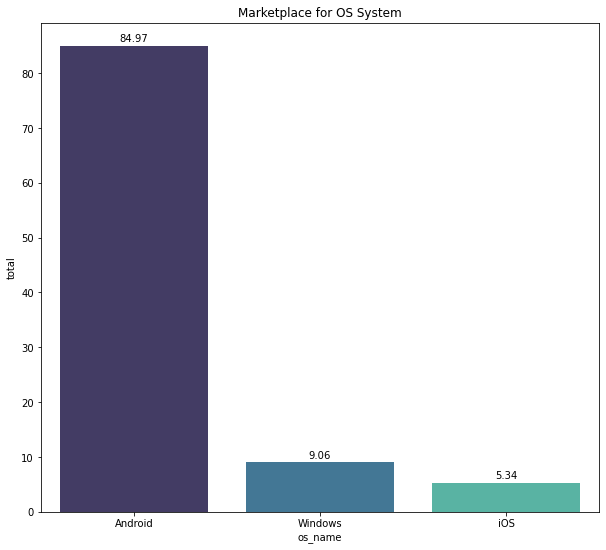

In [155]:
plt.figure(figsize=(10,9))
plot = sns.barplot(df_os_system['os_name'], df_os_system['total'], palette='mako')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Marketplace for OS System')
plt.savefig('OS.png')

### Top 5. Browser for Video Streaming

In [156]:
df_web = round((pd.crosstab(index=df8['browser_name'], columns='share %', values='share %', aggfunc='count', normalize=True) * 100),2).reset_index().sort_values('share %', ascending=False).head(5)
df_web

col_0,browser_name,share %
3,Chrome,36.90
4,Chrome Mobile,19.30
13,Facebook,18.38
5,Chrome Mobile WebView,7.95
41,UC Browser,3.77


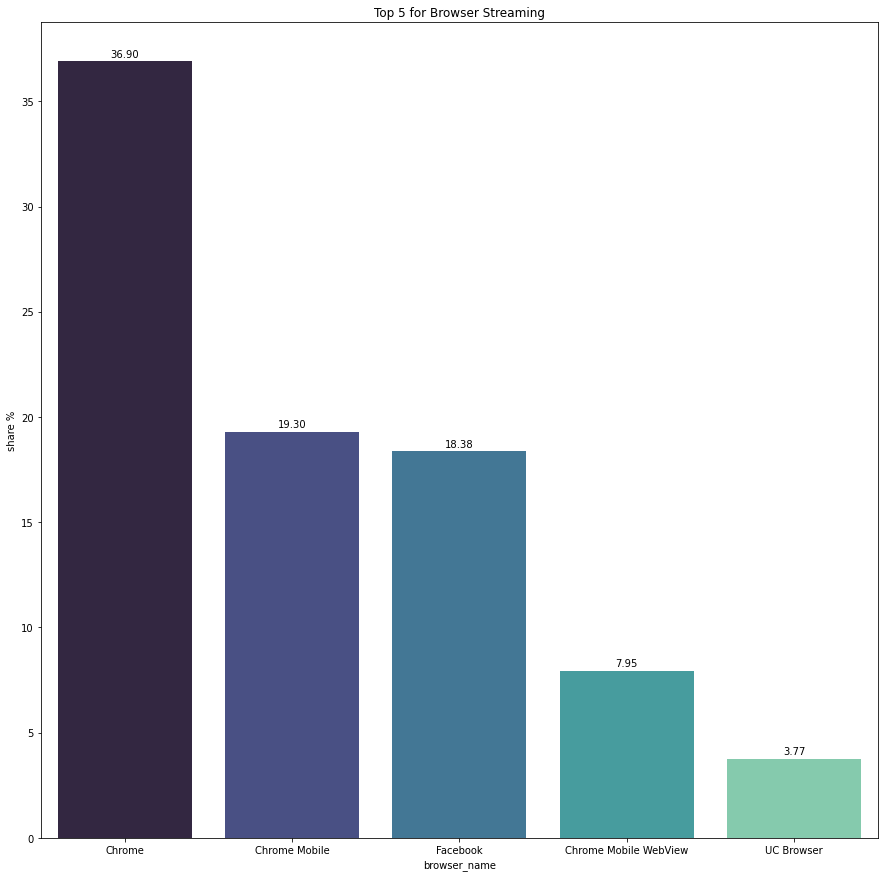

In [157]:
plt.figure(figsize=(15,15))
plot = sns.barplot(df_web['browser_name'], df_web['share %'], palette='mako')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Top 5 for Browser Streaming')
plt.savefig('Browser.png')

## Platform for streaming video

In [158]:
df_platform = round((pd.crosstab(index=df8['platform'], columns='share %', values='share %', aggfunc='count', normalize=True) * 100),2).reset_index().sort_values('share %', ascending=False).head(5)
df_platform

col_0,platform,share %
6,web-mobile,58.49
0,app-android,23.49
5,web-desktop,9.76
2,tv-android,5.62
1,app-ios,1.69


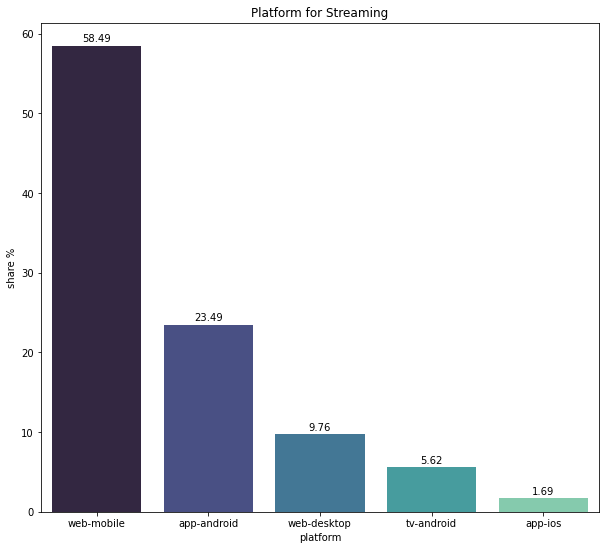

In [159]:
plt.figure(figsize=(10,9))
plot = sns.barplot(df_platform['platform'], df_platform['share %'], palette='mako')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Platform for Streaming')
plt.savefig("Platform.png")

## Transaction User according Date

In [160]:
df_transaction = pd.crosstab(index=df8['date'], columns='total', values='total', aggfunc='count').reset_index()
df_transaction

col_0,date,total
0,1,6749
1,2,45244
2,3,47033
3,4,47690
4,5,45140
5,6,48696
6,7,48158
7,8,43924
8,9,45582
9,10,54682


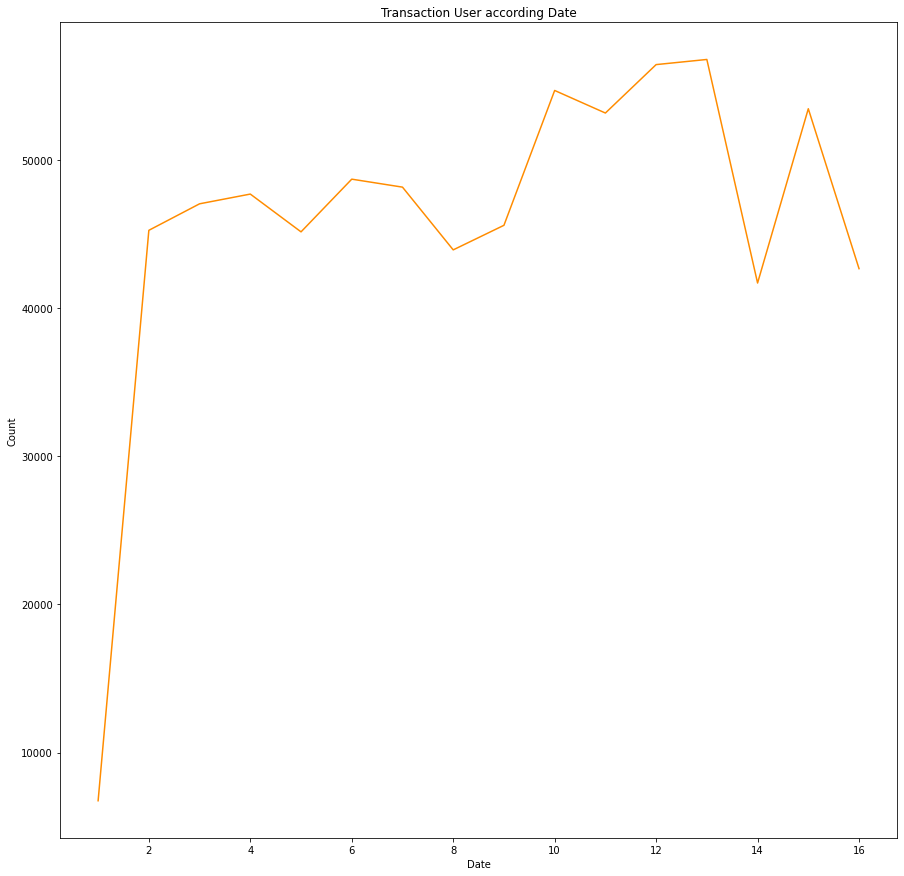

In [161]:
plt.figure(figsize=(15,15))
plt.plot(df_transaction['date'], df_transaction['total'], color='darkorange')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Transaction User according Date")
plt.savefig("User_Transaction.png")

## Top 10 Category

In [162]:
df_category = (pd.crosstab(index=df8['category_name'], columns='share %', values='share %', aggfunc='count', normalize=True) * 100).round(2).reset_index().sort_values('share %', ascending=False).head(10)
df_category

col_0,category_name,share %
12,TV Channel,34.88
2,Entertainment,21.04
10,News,19.94
11,Sports,8.12
8,Movies,5.39
13,TV Show,4.05
9,Music,2.30
14,Vlog,1.62
7,Lifestyle,1.44
3,Funny,0.45


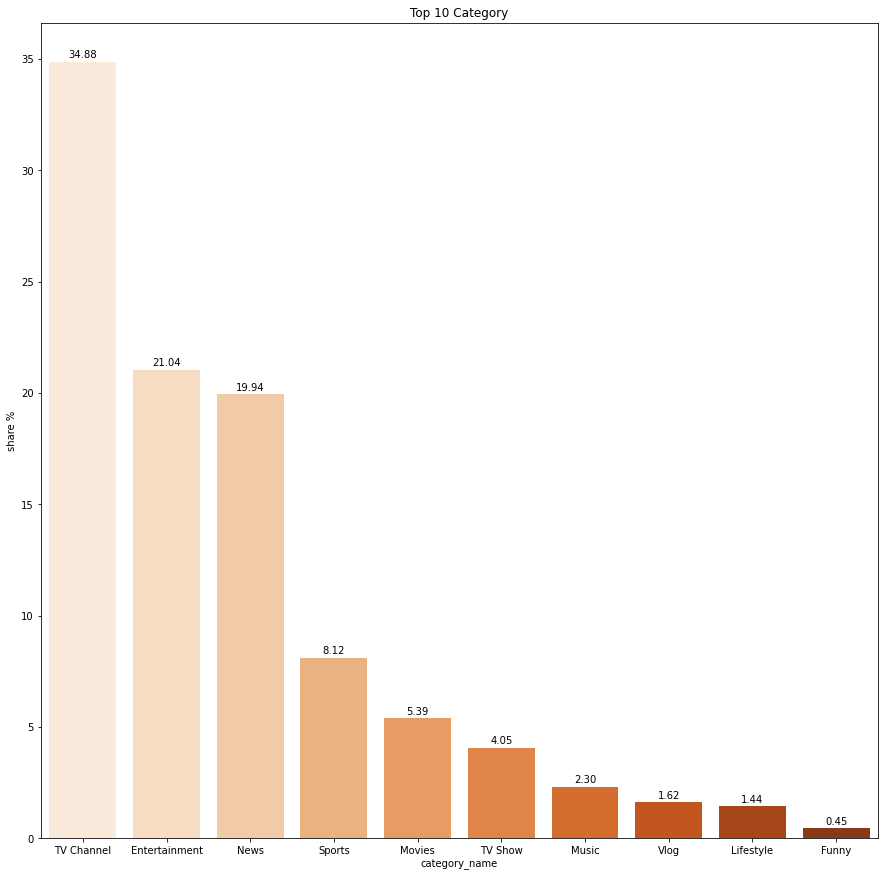

In [163]:
plt.figure(figsize=(15,15))
plot = sns.barplot(df_category['category_name'], df_category['share %'], palette='Oranges')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Top 10 Category')
plt.savefig("category.png")

## Content Type

In [164]:
df_streaming = round((pd.crosstab(index=df8['content_type'], columns='share %', values='share %', aggfunc='count', normalize=True) * 100),2).reset_index().sort_values('share %', ascending=False)
df_streaming

col_0,content_type,share %
2,vod,63.44
1,livestreaming,36.18
0,catchup,0.39


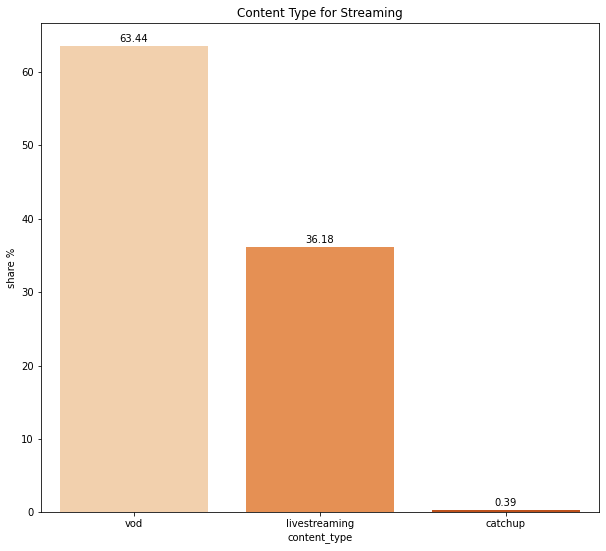

In [165]:
plt.figure(figsize=(10,9))
plot = sns.barplot(df_streaming['content_type'], df_streaming['share %'], palette='Oranges')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Content Type for Streaming')
plt.savefig("Content_type.png")

## Top 10 play Duration

In [166]:
df_visit = pd.crosstab(index=df8['play_duration'], columns='total', values='total', aggfunc='count').reset_index().sort_values('total', ascending=False).head(10)
df_visit

col_0,play_duration,total
0,0,177023
15,15,38871
60,60,36206
30,30,19967
45,45,11168
120,120,9794
180,180,6483
75,75,6176
3,3,5957
90,90,5800


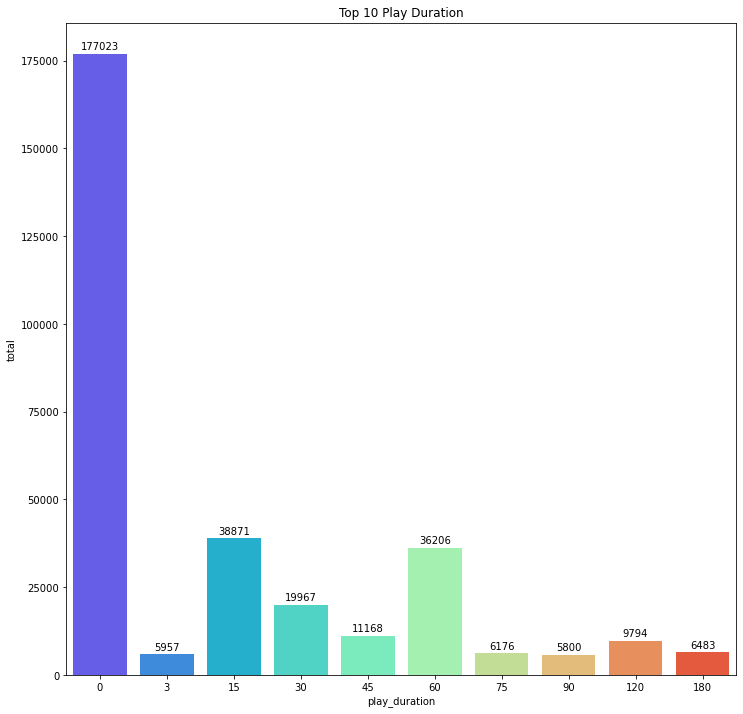

In [167]:
plt.figure(figsize=(12,12))
plot = sns.barplot(df_visit['play_duration'], df_visit['total'], palette='rainbow')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Top 10 Play Duration')
plt.savefig("Play_duration.png")

## Top 10 Visitor

In [168]:
df_watcher = pd.crosstab(index=df8['hash_watcher_id'], columns='total', values='total', aggfunc='count').reset_index().sort_values('total', ascending=False).head(10)
df_watcher

col_0,hash_watcher_id,total
48131,133af93c4a0191b2d31fecb34b7653836abe32b769be23...,203
330544,83f4d120aaa71c673ceae6733feb59687272e7a00e2bc9...,126
191712,4c7b2db7b81213a4a8ada022142a0ce320b1826b8ad079...,123
343451,8909a84bbdd20a837c88977687efe839d0aac7c72891ba...,118
196558,4e6972d0d83046c5601773506b8f13009515deb45a0dcd...,112
616631,f6412c7764aec4826de4888462b7bb225833d48d544b62...,111
443850,b11d6374348cfff917a41543edf3ea128d9faa2d7667a6...,90
337364,86a2b1765777e4b55825e0a084f3941e7b923870ab91ac...,74
84232,219e2b2c5ef39dbf7d4beebfa076b3c8cb233abc000664...,66
523979,d12b1c56cecd50d2fb1cb3c982083faffc946f04d6dc1a...,65


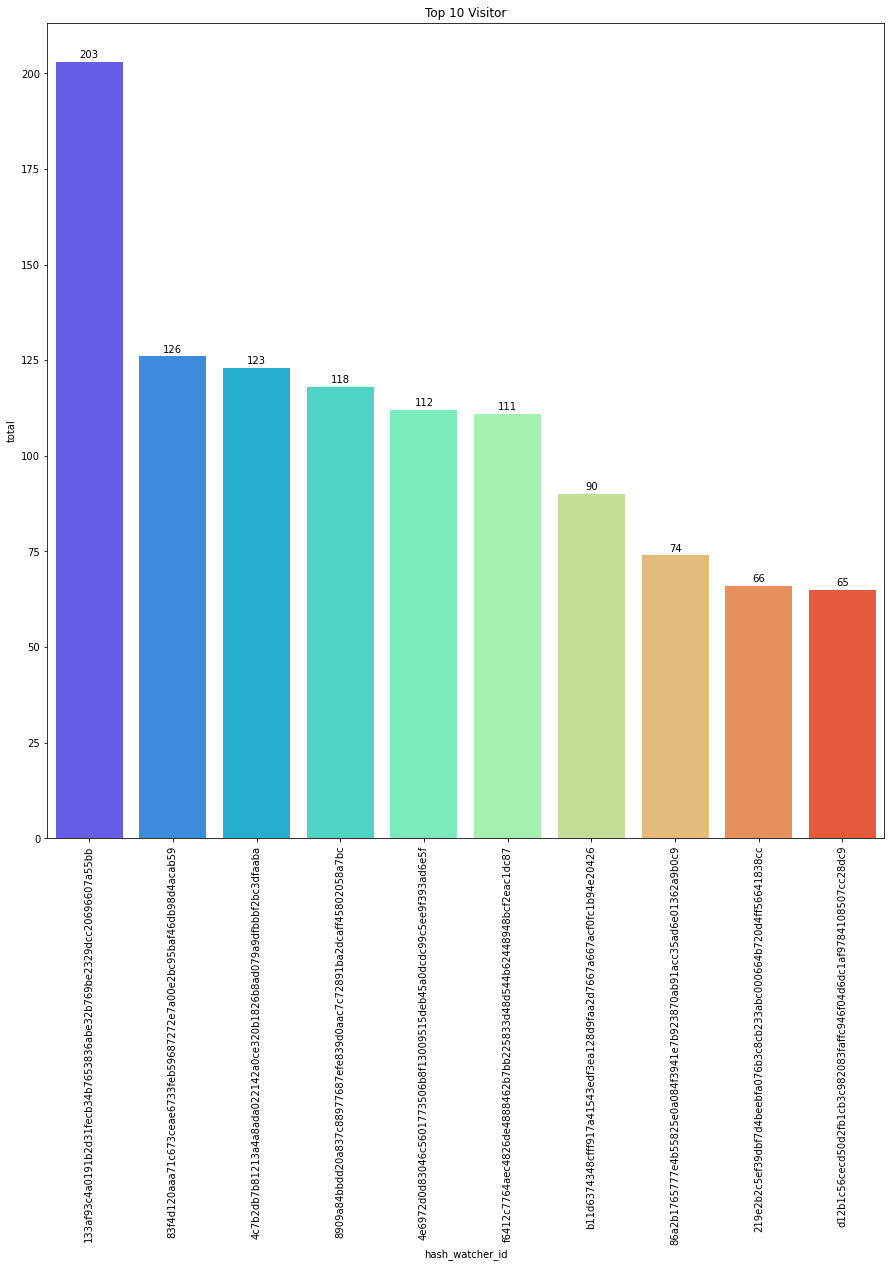

In [169]:
plt.figure(figsize=(15,15))
plot = sns.barplot(df_watcher['hash_watcher_id'], df_watcher['total'], palette='rainbow')
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.title('Top 10 Visitor')
plt.savefig("Visitor.png")

## Machine Learning 

In [170]:
df_ml = df8.copy()

In [171]:
df_ml.sample(5)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,play_duration,content_type,stream_type,title,category_name,video_duration,sub_video_duration,date,hour
332950,0122e4c526c60fcd6dcbd3254742b03295ceb2bfa89c71...,266e3686c0128b1af2b09a0f3be5d67894507a07e90584...,7fc38f6dcceb0d5764d7eb6f599115ac05c854de16d232...,7c1ab61bac2698393360824f9d294b0feef62eec611d21...,f43198d357eadac03a7e363b1edcecb80b7d9d68d4672a...,True,direct,tv-tizen,2020-02-16 03:08:49,2020-02-16 03:09:21,home,300000.0,200-500,1125000,0.0,others,True,videojs,False,"0,0,0",Android,5.0,Mozilla/5.0 (SMART-TV; LINUX; Tizen 5.0) Apple...,compatible,vidio,True,False,30,vod,RadioStream,Fox Movies Premium (501) - Dawn of The Planet ...,Movies,32.0,2.0,16,3
361000,f8809aff4d69bece79dabe35be0c708b890d7eafb841f1...,9661a5c6d12de9a2de89a7547b84ef41b529a7e3167c97...,2a7c1e9c27e68481b8787641f84d1aa7dcb6ddc98679f2...,3df93c387512370fa8832b55e55ded049fafe3cd6c1242...,120cd1d6801164dae45107a6ef5a74d220313a25a60e7a...,False,direct,web-mobile,2020-02-05 18:43:08,2020-02-05 19:21:42,https://m.vidio.com/search?utf8=%E2%9C%93&q=In...,300000.0,200-500,866250000,1.0,internal,False,videojs,True,"0,0,0",iOS,11.1.1,Mobile Safari,11.0,vidio,False,False,2310,livestreaming,TvStream,Indosiar,TV Channel,2314.0,4.0,5,18
285129,9ae8f17cfc8ba7fd8fb34b2a194ef965a3b36a40839a46...,d6367d96cb936422bf4beadae4aa741c925d03c0abe443...,f6f83f068eebb29b200bcd31ba57e8b587d37d1c85cbbf...,8fe94731df1d844ddfa3209ff73c39a48c4e14cb3a4157...,7967bb36aeb8de5fc1528443eebd20a4c7501e4d41851e...,False,direct,tv-android,2020-02-12 04:49:01,2020-02-12 05:34:02,https://m.vidio.com/live/6545-utah-jazz-vs-hou...,300000.0,200-500,1023750000,1115.0,empty,False,KmkExoVideoView,False,"0,0,0",Android,23,Chrome,8.6.395,vidio,False,False,2730,livestreaming,TvStream,RCTI,TV Channel,2701.0,-29.0,12,4
325722,41d05477719cfa45d851b30f8484ecab54b8886d398af2...,bab59016d4042e266ac10ea163278dd5a2e8b57b6ccfbe...,2aba72de6e7e82dc414542eade220e9b56175a1358475d...,e41df8dee57bc3cac400e4f02cd53cee5862ae84039e88...,8d20a4efa03b989d3fc0f1ad3e503d47f88c91ae99cc13...,False,embed,web-mobile,2020-02-13 01:41:21,2020-02-13 01:42:53,https://m.kapanlagi.com/dangdut/gebby-vesta-un...,300000.0,200-500,2175000,0.0,kapanlagi,True,videojs,True,"0,0,0",Android,8.1.0,Facebook,244.0.0,vidio,False,False,58,vod,RadioStream,Rio Reifan Divonis 1 Tahun 8 Bulan Hukuman Pen...,Entertainment,92.0,34.0,13,1
516325,fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...,1c16acb7986bb577f4c57feccc3063229b97e9dfc43c4c...,6661c22f95e499011df8ae412d78e5ac37eb7fa7c2dd46...,981749566aafa8dbdc45119cbd8349b3c774635e641717...,7aeb2be12c7ec5319f09f18ccc6eb5588fce49b4a1b9b2...,False,direct,tv-android,2020-02-14 03:46:19,2020-02-14 06:40:43,deeplink,300000.0,200-500,3937500000,6427.0,others,False,KmkExoVideoView,False,"0,0,0",Android,26,Chrome,8.6.395,vidio,False,False,10500,livestreaming,TvStream,SCTV,TV Channel,10464.0,-36.0,14,3


In [172]:
df_ml_1 = df_ml[['is_premium','has_ad','os_name','content_type','stream_type']]

In [173]:
df_ml_1.isna().sum()

is_premium      0
has_ad          0
os_name         0
content_type    0
stream_type     0
dtype: int64

In [174]:
df_ml_1.head()

,is_premium,has_ad,os_name,content_type,stream_type
241,True,False,Android,livestreaming,TvStream
242,True,False,Android,livestreaming,TvStream
581,True,False,Android,livestreaming,TvStream
763,True,False,Android,livestreaming,TvStream
764,True,False,Android,livestreaming,TvStream


In [175]:
df_ml_1['is_premium'] = df_ml_1['is_premium'].map({True : 1, False : 0})

In [176]:
df_ml_1['has_ad'] = df_ml_1['has_ad'].map({True :1, False : 0})

In [177]:
df_ml_1['os_name'].unique()

array(['Android', 'iOS', 'Ubuntu', 'Linux', 'Mac OS X', 'Windows',
       'Tizen', 'Fedora', 'BlackBerry OS', 'Chrome OS', 'Windows Phone',
       'Red Hat'], dtype=object)

In [178]:
### Android: Android, Chrome OS
### IOS: iOS, Mac OS X
### Windows: Windows, Windows Phone 
### Other: Tizen, Fedora, BlackBerry OS, Ubuntu, Linux, Red Hat 

In [179]:
## Recategorize OS_name 

In [180]:
def os_category(x):
    if (x == 'Android') | (x == 'Chrome OS'):
        return 'Android'
    elif (x == 'iOS') | (x == 'Mac OS X'):
        return 'iOS'
    elif (x == 'Windows') | (x == 'Windows Phone'):
        return 'Windows'
    else:
        return 'Other'

In [181]:
df_ml_1['os_type'] = df_ml_1['os_name'].apply(os_category)

In [182]:
df_ml_2 = df_ml_1.drop(columns=['os_name'], axis=1)

In [183]:
df_ml_2.head()

,is_premium,has_ad,content_type,stream_type,os_type
241,1,0,livestreaming,TvStream,Android
242,1,0,livestreaming,TvStream,Android
581,1,0,livestreaming,TvStream,Android
763,1,0,livestreaming,TvStream,Android
764,1,0,livestreaming,TvStream,Android


In [184]:
df_ml_3 = pd.get_dummies(df_ml_2, columns=['content_type','stream_type','os_type'])

In [185]:
df_ml_3

,is_premium,has_ad,content_type_catchup,content_type_livestreaming,content_type_vod,stream_type_EventStream,stream_type_RadioStream,stream_type_TvStream,os_type_Android,os_type_Other,os_type_Windows,os_type_iOS
241,1,0,0,1,0,0,0,1,1,0,0,0
242,1,0,0,1,0,0,0,1,1,0,0,0
581,1,0,0,1,0,0,0,1,1,0,0,0
763,1,0,0,1,0,0,0,1,1,0,0,0
764,1,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
742577,0,1,0,0,1,0,1,0,1,0,0,0
742578,0,1,0,0,1,0,1,0,1,0,0,0
742579,0,1,0,0,1,0,1,0,1,0,0,0
742580,0,1,0,0,1,0,1,0,1,0,0,0


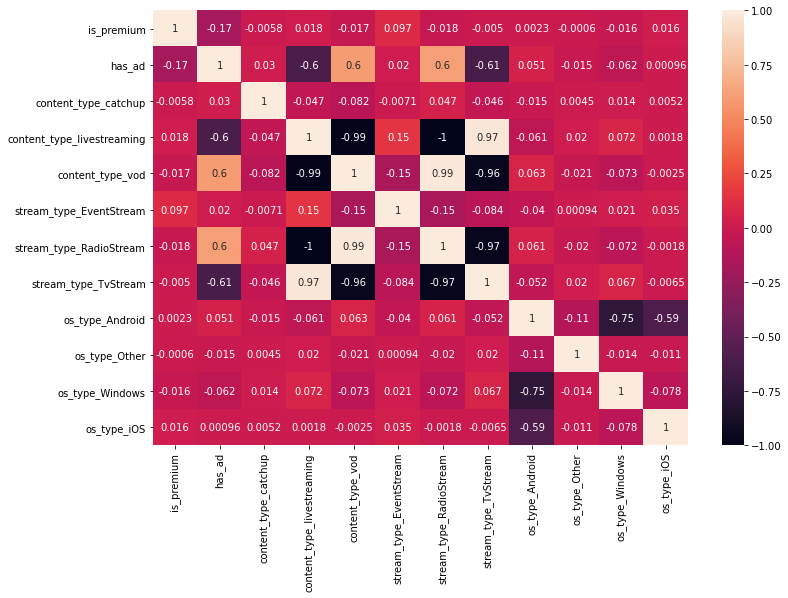

In [186]:
## Cek Korelasi 
plt.figure(figsize=(12,8))
sns.heatmap(df_ml_3.corr(), annot=True)

In [187]:
## Spliting Data

In [188]:
X = df_ml_3.drop(columns='has_ad')
y = df_ml_3['has_ad']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .80, random_state = 42) ## Khusus classifikasi harus pake parameter stratify

In [190]:
X_train.head()

,is_premium,content_type_catchup,content_type_livestreaming,content_type_vod,stream_type_EventStream,stream_type_RadioStream,stream_type_TvStream,os_type_Android,os_type_Other,os_type_Windows,os_type_iOS
238683,0,0,0,1,0,1,0,1,0,0,0
353052,0,0,1,0,0,0,1,1,0,0,0
125358,0,0,0,1,0,1,0,1,0,0,0
442449,0,0,1,0,0,0,1,1,0,0,0
192724,0,0,1,0,0,0,1,1,0,0,0


In [191]:
model_LR = LogisticRegression()

In [192]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [193]:
y_pred_train = model_LR.predict(X_train)

In [194]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, F1

In [195]:
Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_F1_train = Eva_Matrix(model_LR, X_train, y_train)

In [196]:
Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_F1_test = Eva_Matrix(model_LR, X_test, y_test)

In [197]:
data_log = {
    "Log Train" : [Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_F1_train],
    "Log Test" : [Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_F1_test]
}

In [198]:
LOG = pd.DataFrame(data=data_log, index = ['Accuracy','Recall','Precision','F1'])
LOG

,Log Train,Log Test
Accuracy,0.832089,0.831511
Recall,0.806941,0.806220
Precision,0.972566,0.972517
F1,0.882046,0.881595


In [199]:
y_train_LR = model_LR.predict(X_train)

In [200]:
print(classification_report(y_train_LR, y_train))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71    209017
           1       0.81      0.97      0.88    380623

    accuracy                           0.83    589640
   macro avg       0.86      0.77      0.80    589640
weighted avg       0.85      0.83      0.82    589640



In [ ]:
cm_train_LR = confusion_matrix(y_train_LR, y_train, labels=[1, 0])

In [ ]:
df_cm_LR = pd.DataFrame(data=cm_train_LR, columns=['Pred 1','Pred 0'], index=['Akt 1','Akt 0'])
df_cm_LR

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df_cm_LR,annot=True)

In [ ]:
y_test_LR = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test_LR, y_test))

In [ ]:
cm_test_LR = confusion_matrix(y_test_LR, y_test, labels=[1, 0])

In [ ]:
df_cm_test_LR = pd.DataFrame(data=cm_test_LR, columns=['Pred 1','Pred 0'], index=['Akt 1','Akt 0'])
df_cm_test_LR

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df_cm_test_LR,annot=True)